### Look at some decoding results when combining across subjects
- split by regions

In [28]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.classifier_utils as classifier_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *
from constants.decoding_constants import *
import seaborn as sns
from scripts.pseudo_decoding.belief_partitions.belief_partition_configs import *
import scripts.pseudo_decoding.belief_partitions.belief_partitions_io as belief_partitions_io

import scipy
import argparse
import copy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
def plot_weights(args):
    all_conts = belief_partitions_io.get_contributions_for_all_time(args, region_level="structure_level2")
    peaks, orders = spike_utils.find_peaks(all_conts, value_col="mean_cont", time_col="abs_time", region_level="structure_level2")
    _, _ = visualization_utils.plot_pop_heatmap_by_time(all_conts, value_col="mean_cont", region_level="structure_level2", orders=orders)

In [61]:
# sig_unit_level = "pref_conf_99th_window_filter_drift"
# sig_unit_level = "pref_conf_95th_filter_drift"
# sig_unit_level = "belief_partition_all_time_95th"
pref_sig_unit_level = "pref_99th_window_filter_drift"
conf_sig_unit_level = "conf_99th_window_filter_drift"


## All regions, all subjects

In [62]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.subject = "both"

### pref

Warning, shuffle not found: MAGENTA_pref_shuffle_4
Warning, shuffle not found: CIRCLE_pref_shuffle_5
Warning, shuffle not found: STAR_pref_shuffle_8
Warning, shuffle not found: ESCHER_pref_shuffle_8
Warning, shuffle not found: MAGENTA_pref_shuffle_4
Warning, shuffle not found: CIRCLE_pref_shuffle_5
Warning, shuffle not found: STAR_pref_shuffle_8
Warning, shuffle not found: ESCHER_pref_shuffle_8
Warning, shuffle not found: MAGENTA_pref_shuffle_4
Warning, shuffle not found: CIRCLE_pref_shuffle_5
Warning, shuffle not found: STAR_pref_shuffle_8
Warning, shuffle not found: ESCHER_pref_shuffle_8
Warning, shuffle not found: MAGENTA_pref_shuffle_4
Warning, shuffle not found: CIRCLE_pref_shuffle_5
Warning, shuffle not found: STAR_pref_shuffle_8
Warning, shuffle not found: ESCHER_pref_shuffle_8
0.7279427083333334


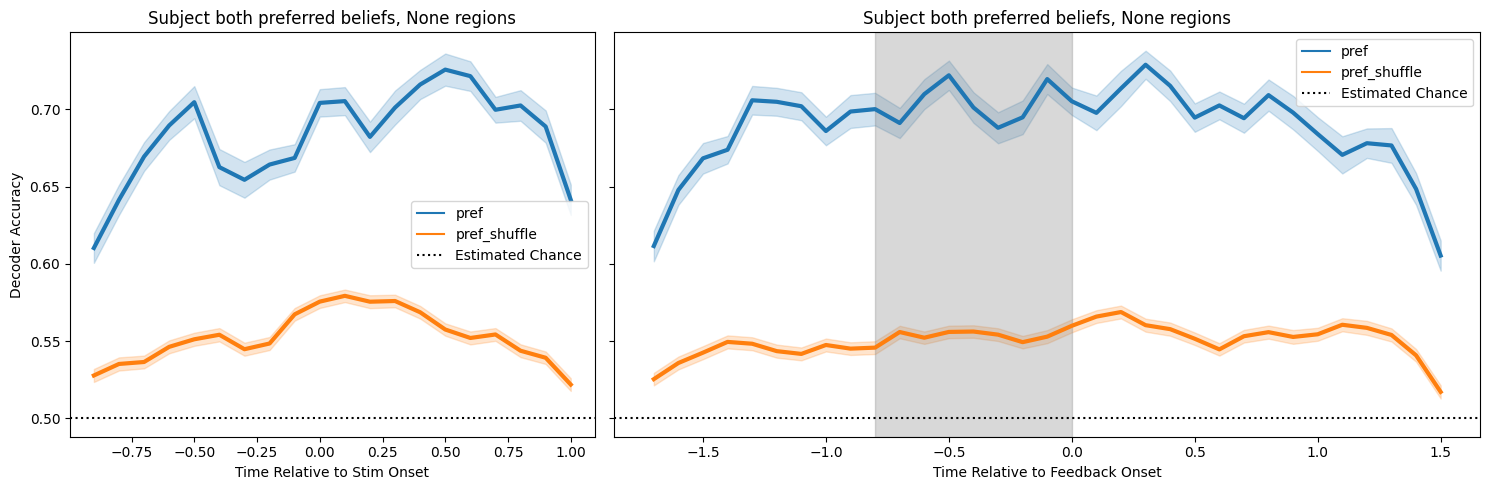

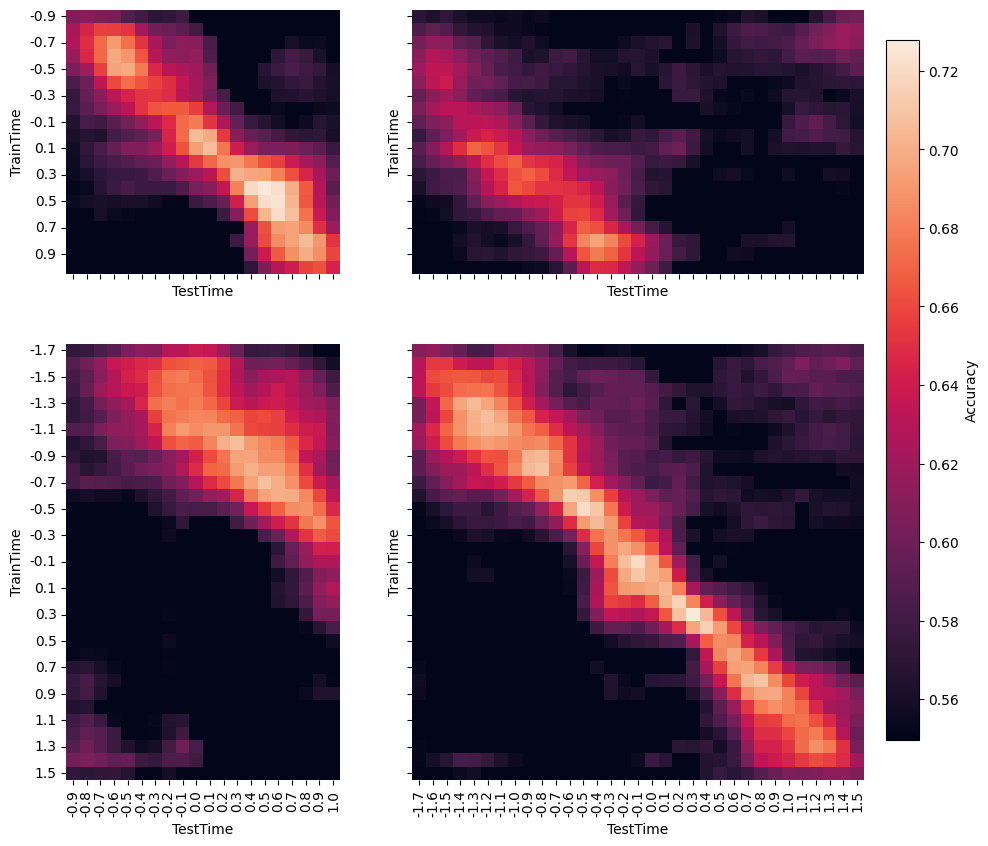

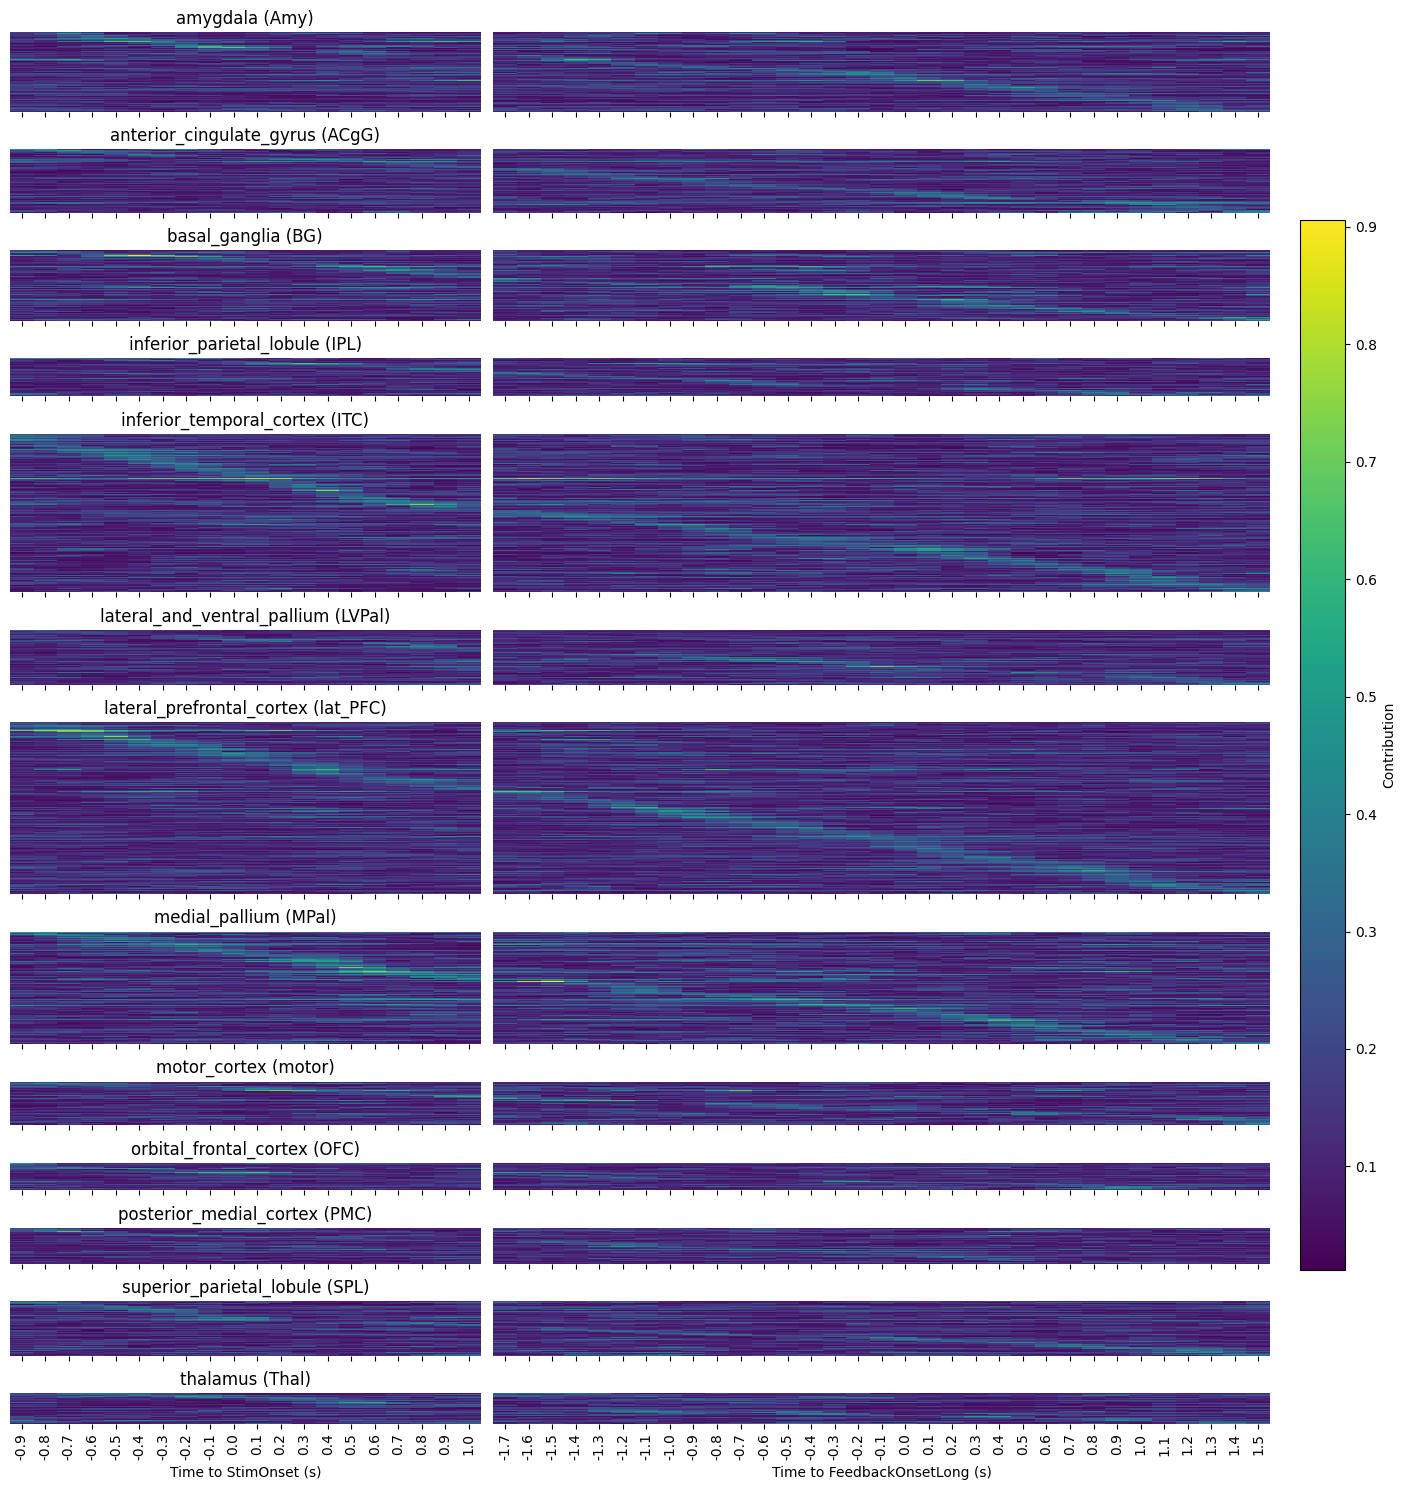

In [63]:
args.mode = "pref"
args.sig_unit_level = pref_sig_unit_level
visualization_utils.plot_combined_accs(args)
visualization_utils.plot_combined_cross_accs(args)
plot_weights(args)



### conf

0.8275260416666667


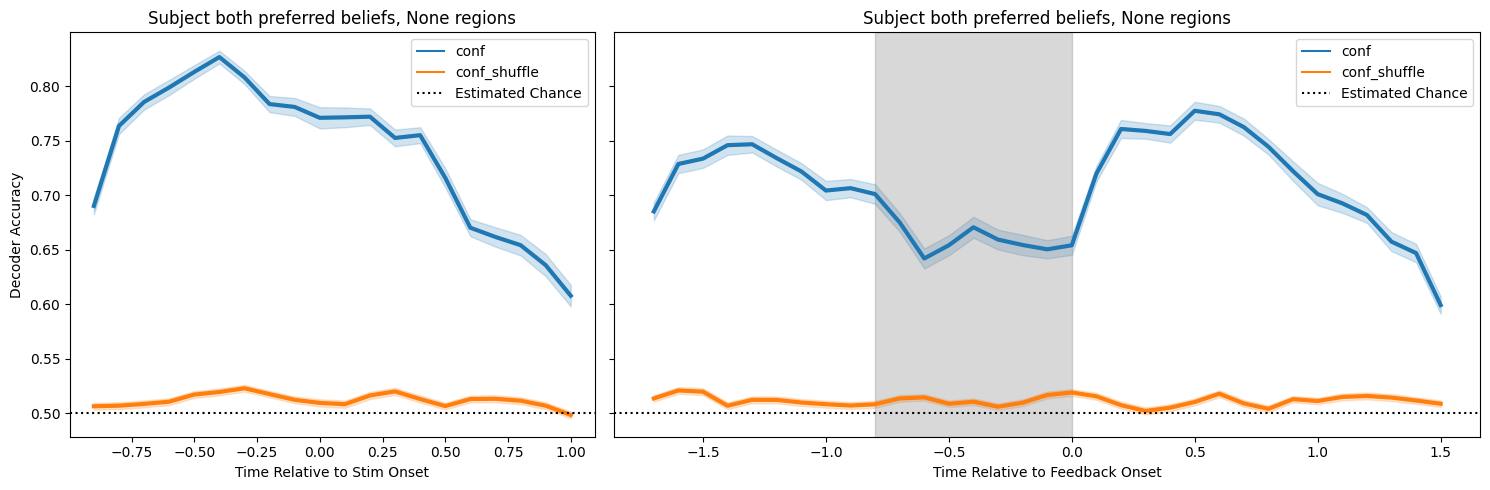

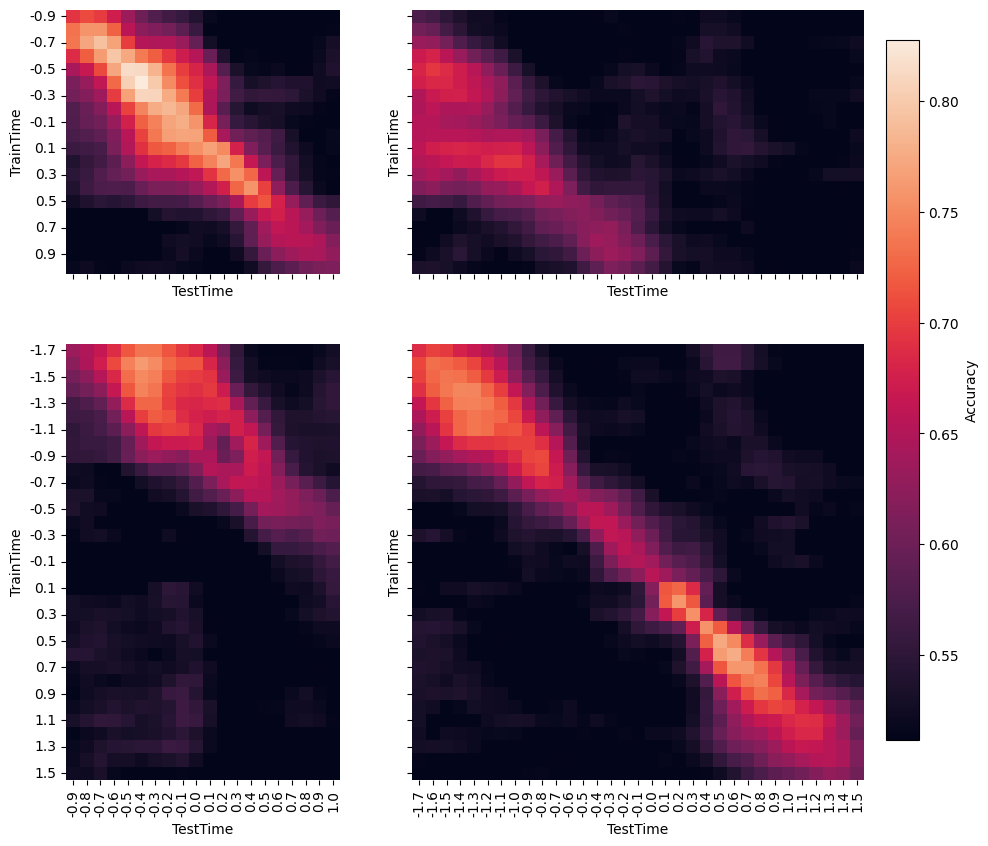

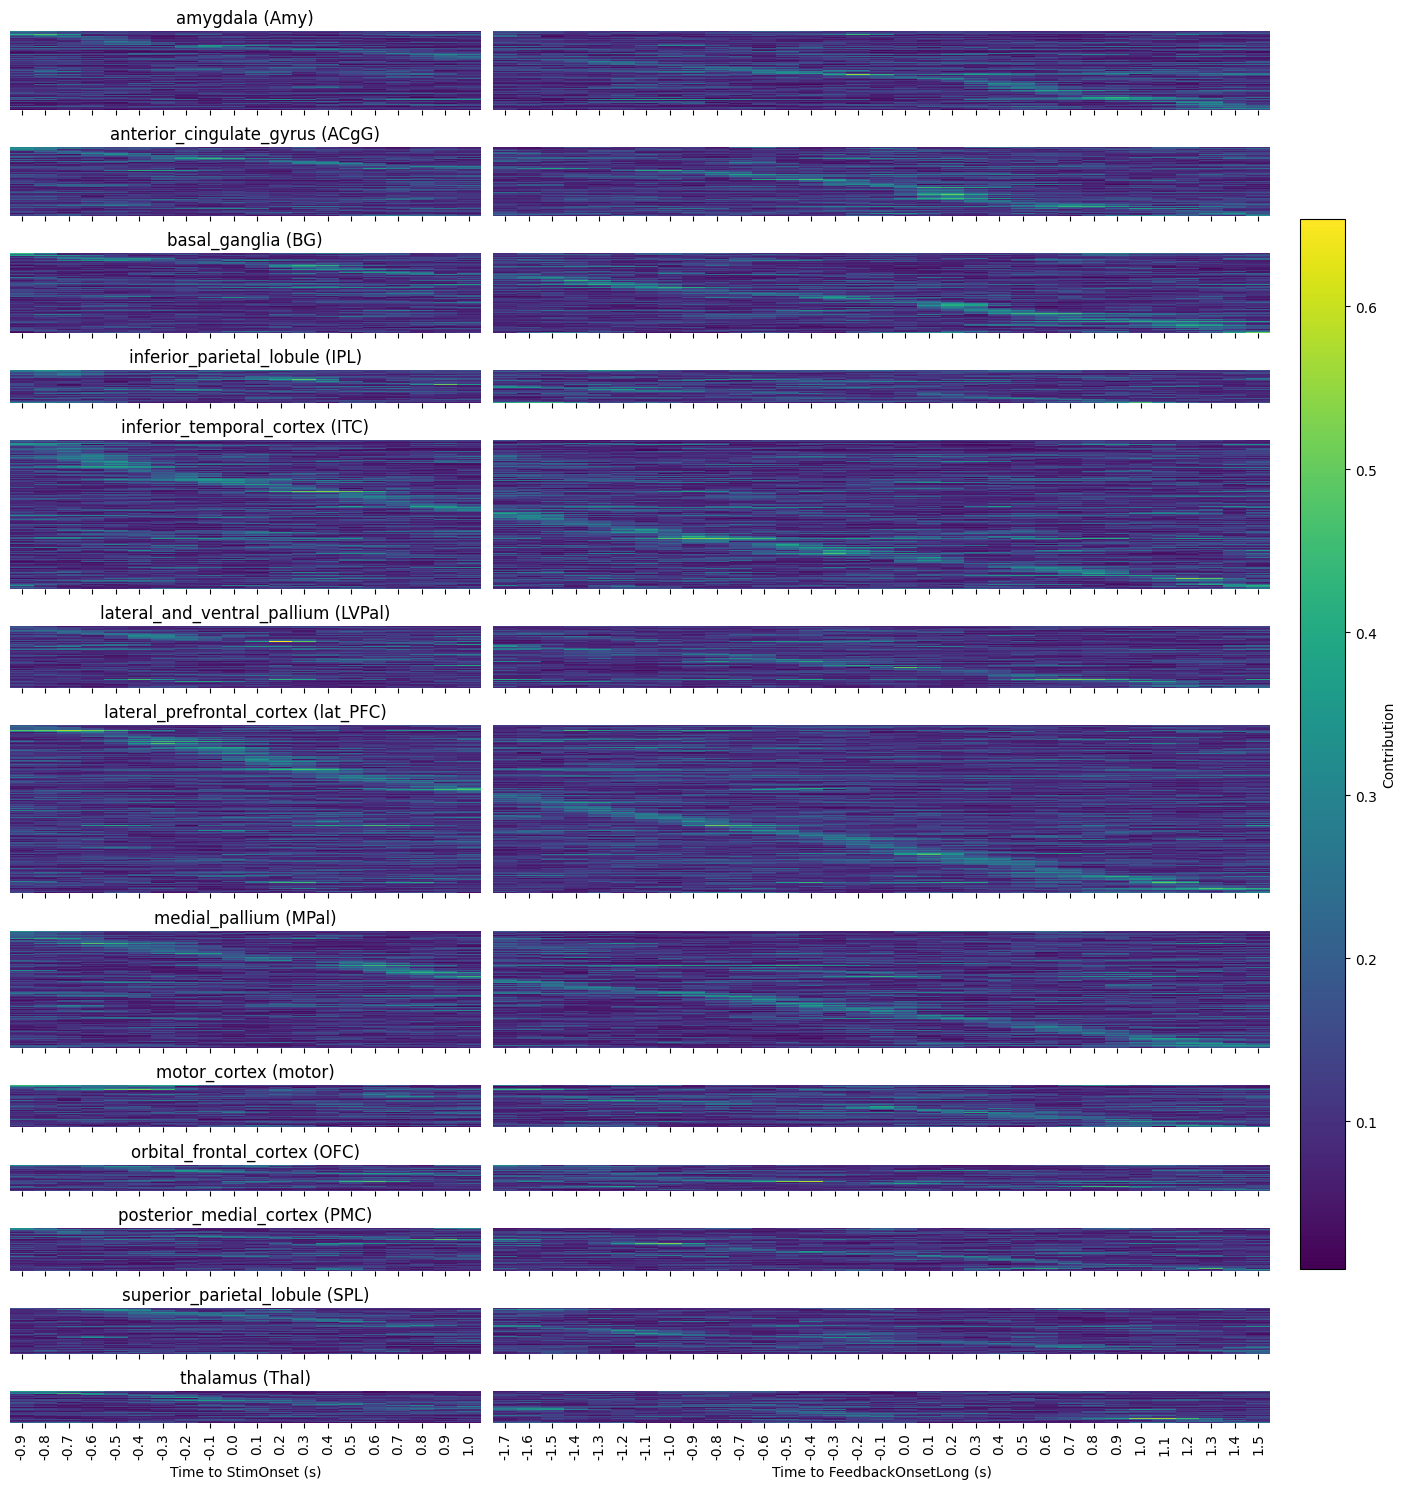

In [64]:
args.mode = "conf"
args.sig_unit_level = conf_sig_unit_level
visualization_utils.plot_combined_accs(args)
visualization_utils.plot_combined_cross_accs(args)
plot_weights(args)



## Hippocampus

In [37]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.subject = "both"
args.region_level = "structure_level2_cleaned"
args.regions = "medial_pallium_MPal"

#### Pref

Warning, shuffle not found: YELLOW_pref_shuffle_2
Warning, shuffle not found: YELLOW_pref_shuffle_3
Warning, shuffle not found: YELLOW_pref_shuffle_4
Warning, shuffle not found: YELLOW_pref_shuffle_6
Warning, shuffle not found: YELLOW_pref_shuffle_7
Warning, shuffle not found: ESCHER_pref_shuffle_8
Warning, shuffle not found: YELLOW_pref_shuffle_9
Warning, shuffle not found: YELLOW_pref_shuffle_2
Warning, shuffle not found: YELLOW_pref_shuffle_3
Warning, shuffle not found: YELLOW_pref_shuffle_4
Warning, shuffle not found: YELLOW_pref_shuffle_6
Warning, shuffle not found: YELLOW_pref_shuffle_7
Warning, shuffle not found: ESCHER_pref_shuffle_8
Warning, shuffle not found: YELLOW_pref_shuffle_9
Warning, shuffle not found: YELLOW_pref_shuffle_2
Warning, shuffle not found: YELLOW_pref_shuffle_3
Warning, shuffle not found: YELLOW_pref_shuffle_4
Warning, shuffle not found: YELLOW_pref_shuffle_6
Warning, shuffle not found: YELLOW_pref_shuffle_7
Warning, shuffle not found: ESCHER_pref_shuffle_8


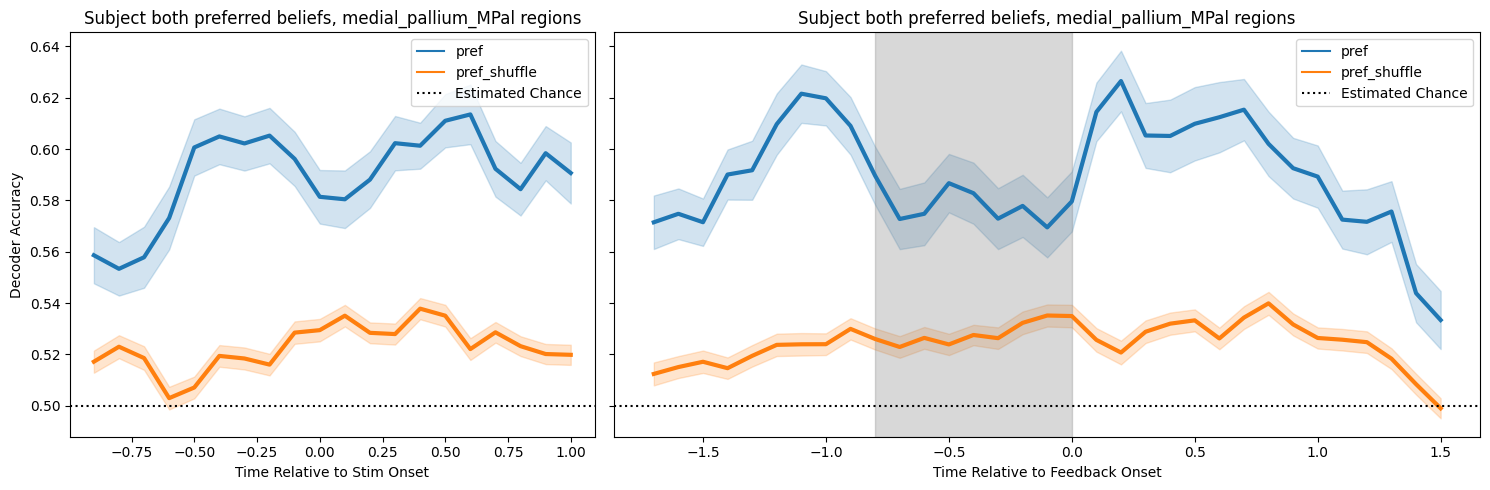

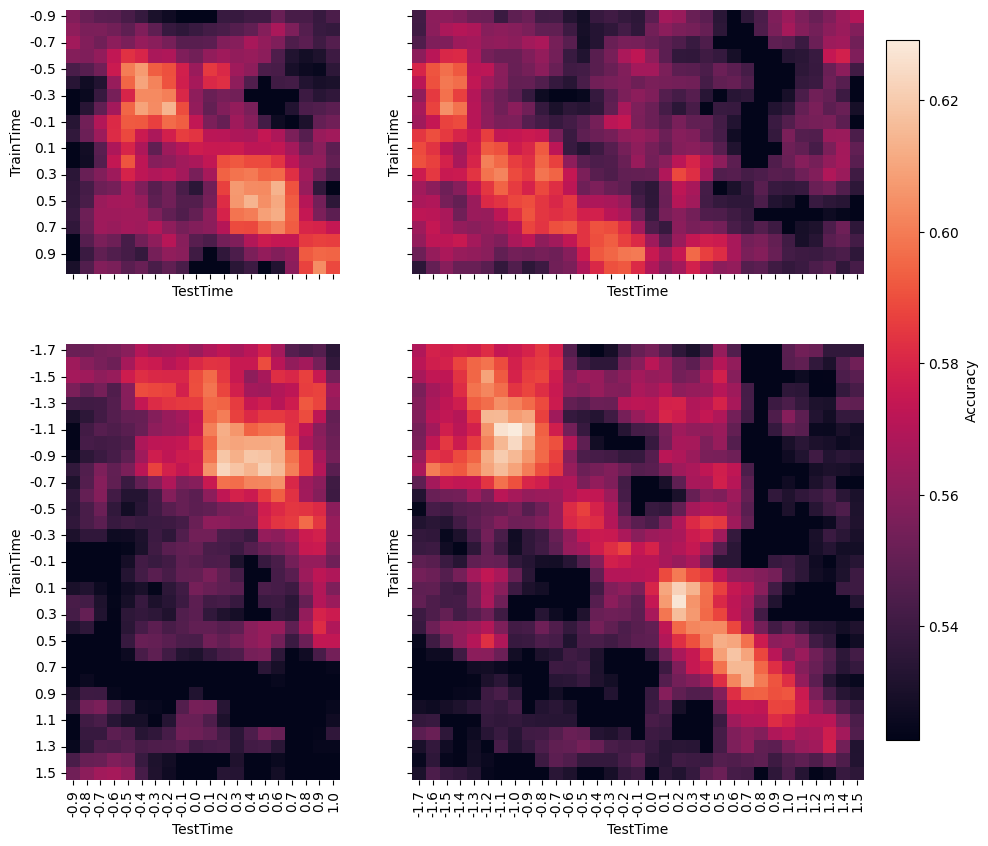

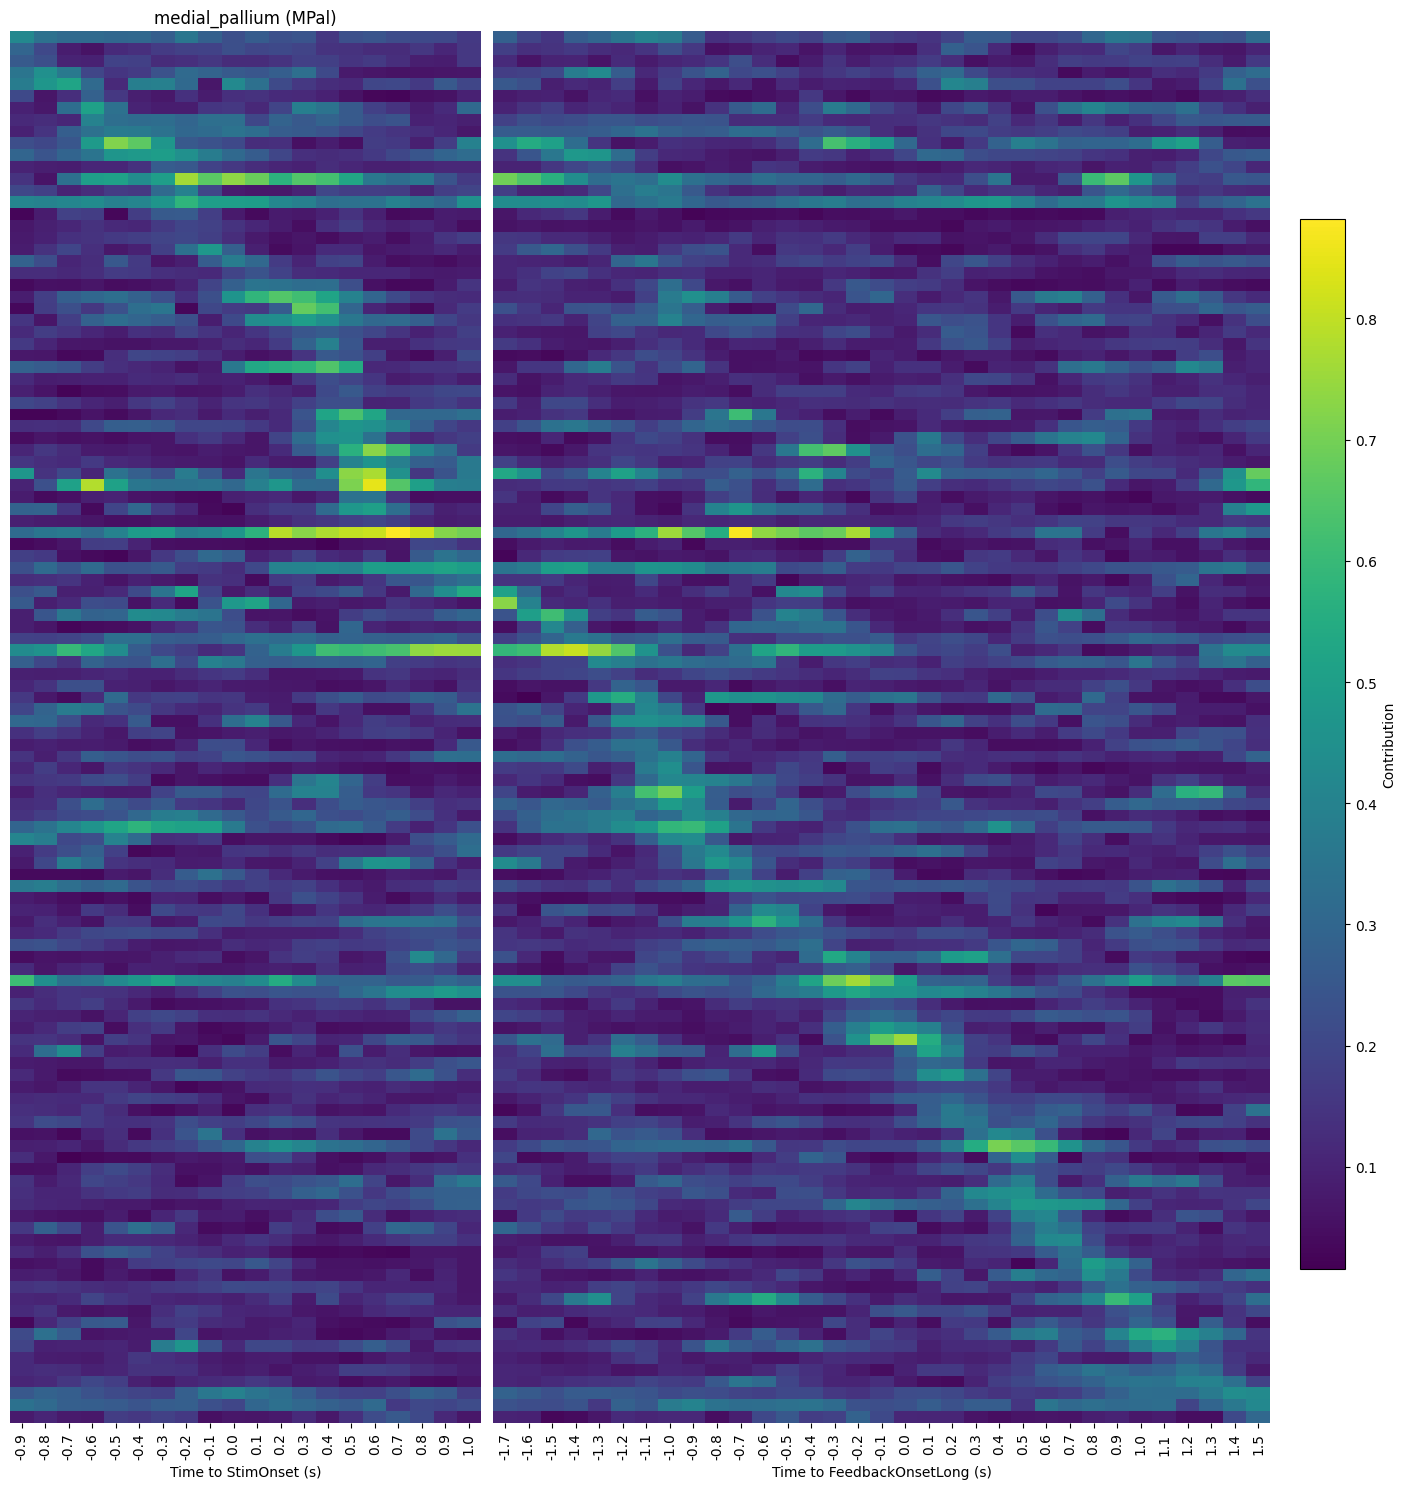

In [38]:
args.mode = "pref"
args.sig_unit_level = pref_sig_unit_level
visualization_utils.plot_combined_accs(args)
visualization_utils.plot_combined_cross_accs(args)
plot_weights(args)



#### Conf

0.6635156249999999


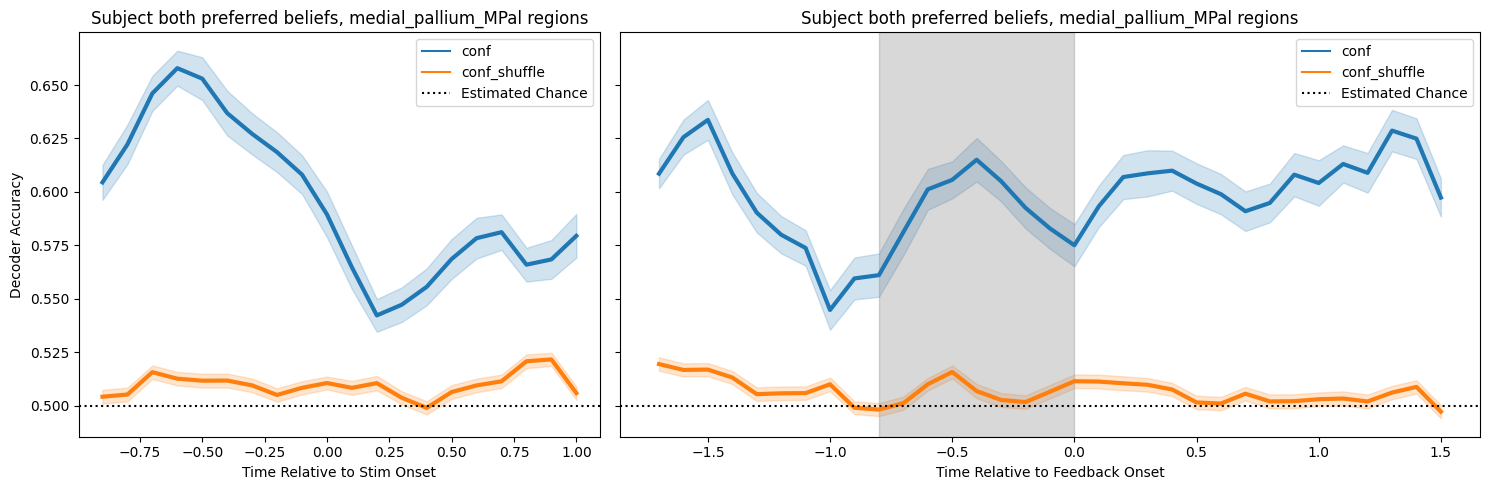

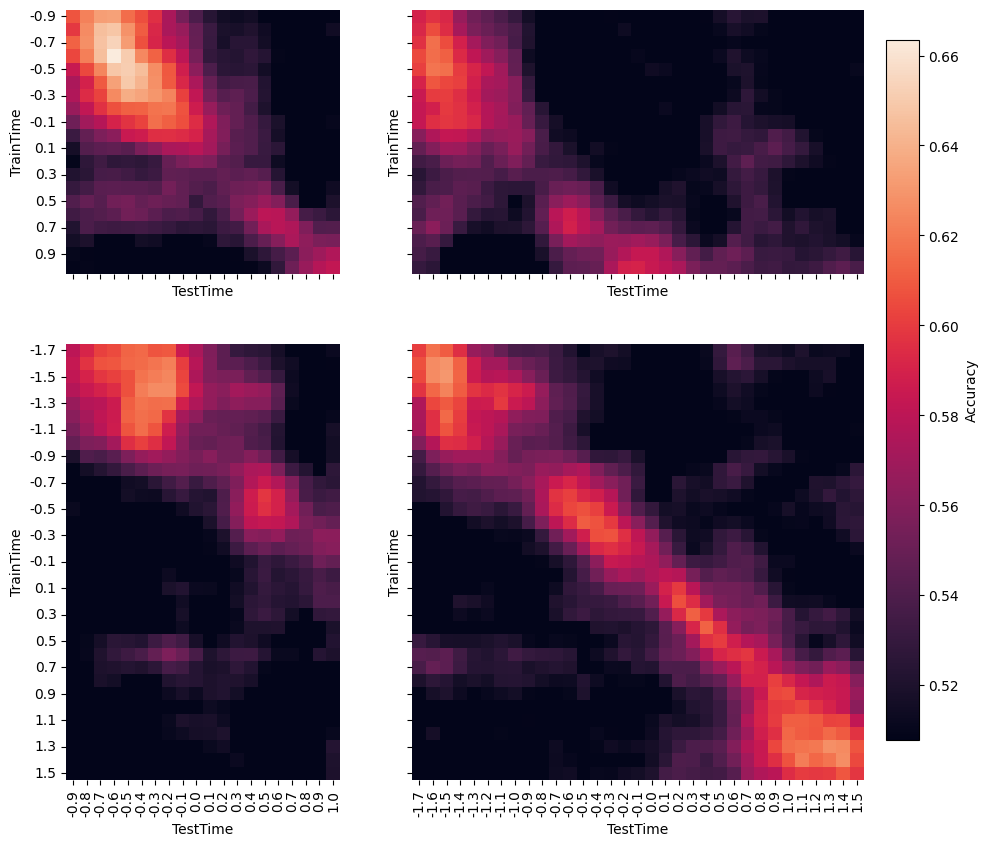

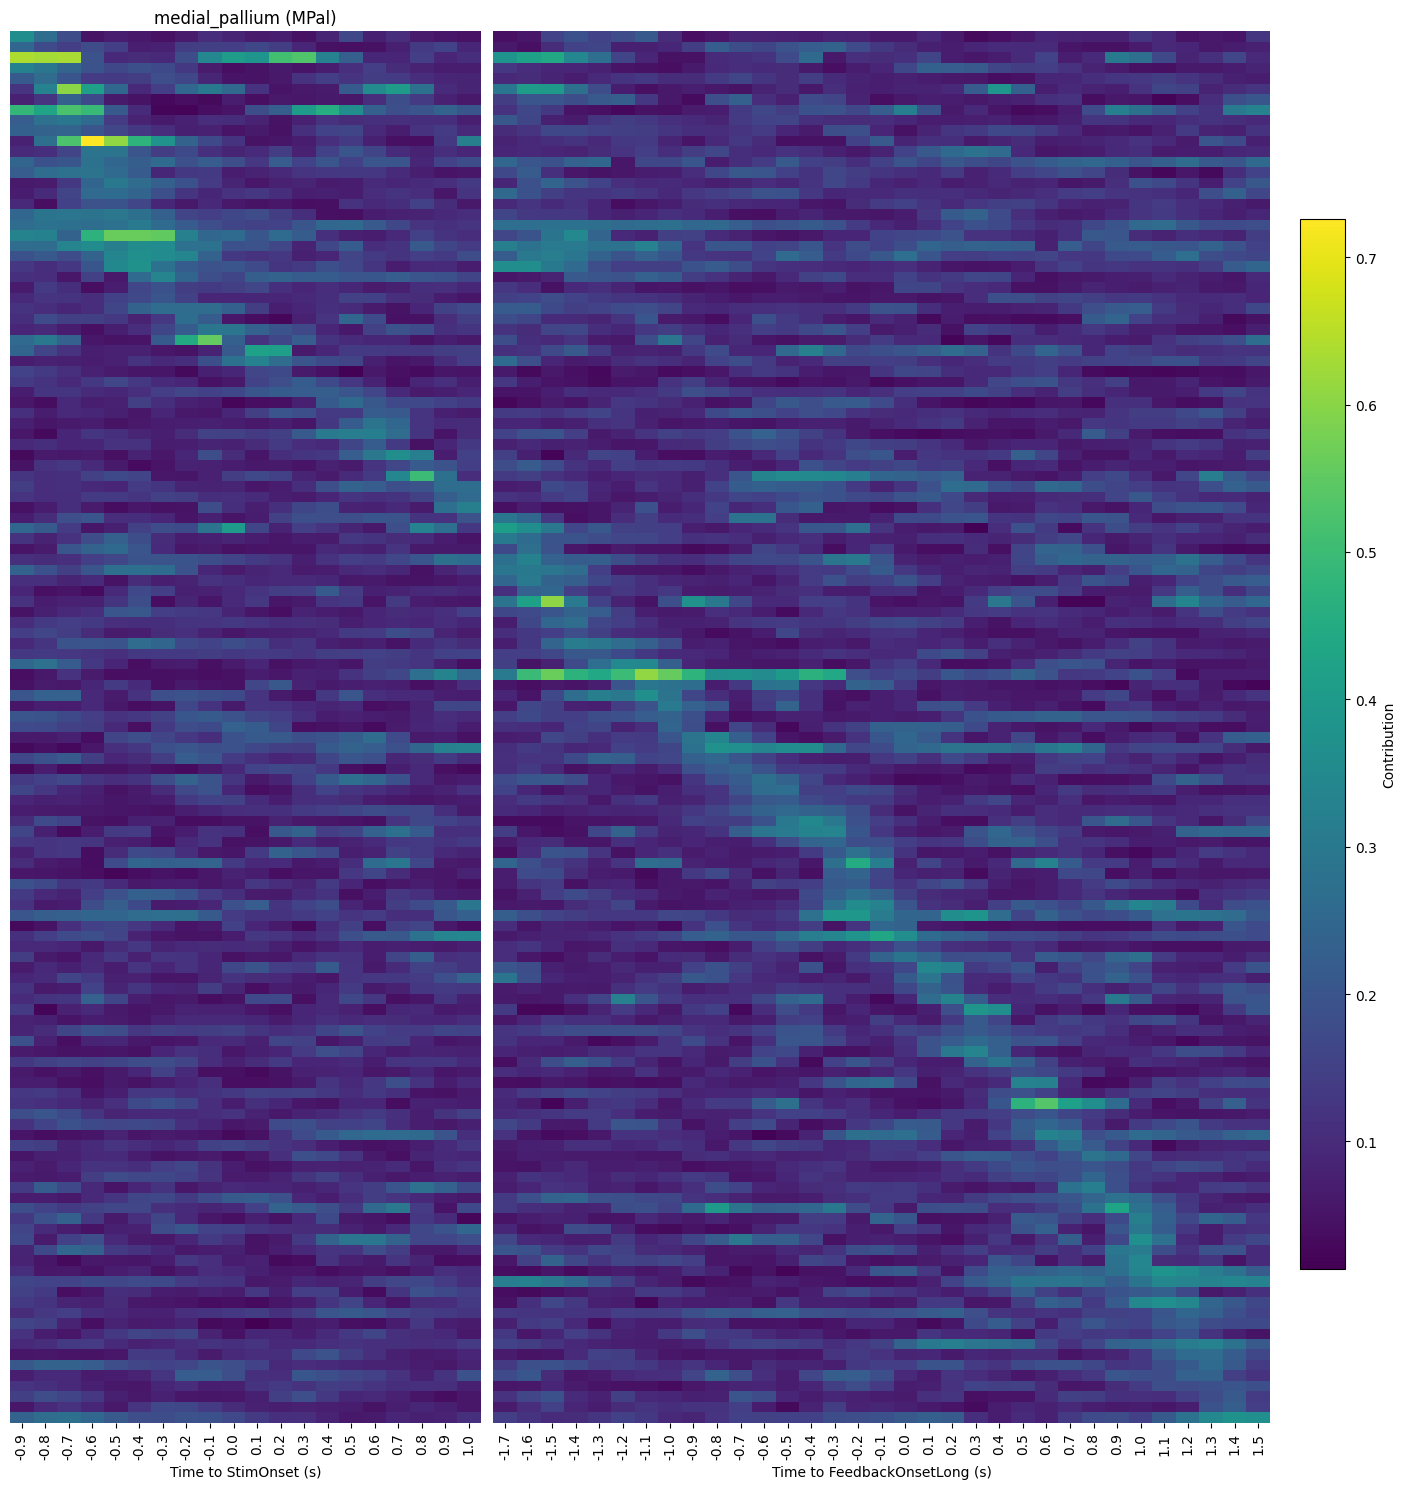

In [39]:
args.mode = "conf"
args.sig_unit_level = "conf_99th_window_filter_drift"

visualization_utils.plot_combined_accs(args)
visualization_utils.plot_combined_cross_accs(args)
plot_weights(args)


#### Cosine sim between conf/pref

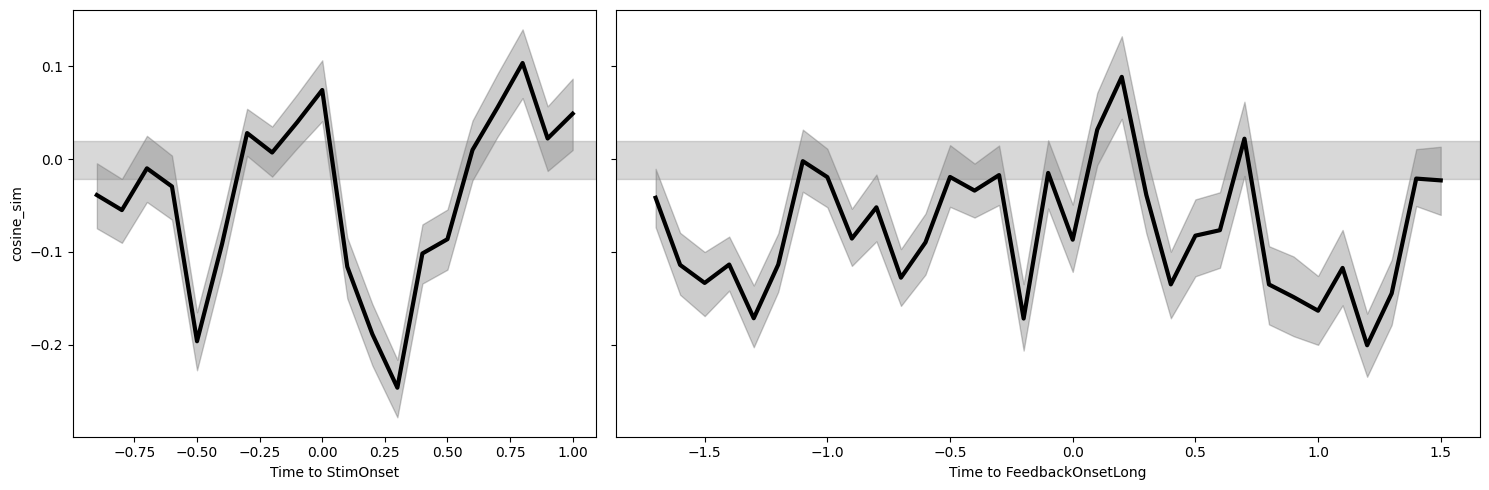

In [40]:
visualization_utils.plot_cosine_sim_between_conf_pref(args)

## ITC

In [43]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.subject = "both"
args.region_level = "structure_level2_cleaned"
args.regions = "inferior_temporal_cortex_ITC"

#### Pref

Warning, shuffle not found: YELLOW_pref_shuffle_2
Warning, shuffle not found: YELLOW_pref_shuffle_3
Warning, shuffle not found: YELLOW_pref_shuffle_4
Warning, shuffle not found: CIRCLE_pref_shuffle_5
Warning, shuffle not found: YELLOW_pref_shuffle_6
Warning, shuffle not found: YELLOW_pref_shuffle_7
Warning, shuffle not found: YELLOW_pref_shuffle_9
Warning, shuffle not found: YELLOW_pref_shuffle_2
Warning, shuffle not found: YELLOW_pref_shuffle_3
Warning, shuffle not found: YELLOW_pref_shuffle_4
Warning, shuffle not found: CIRCLE_pref_shuffle_5
Warning, shuffle not found: YELLOW_pref_shuffle_6
Warning, shuffle not found: YELLOW_pref_shuffle_7
Warning, shuffle not found: YELLOW_pref_shuffle_9
Warning, shuffle not found: YELLOW_pref_shuffle_2
Warning, shuffle not found: YELLOW_pref_shuffle_3
Warning, shuffle not found: YELLOW_pref_shuffle_4
Warning, shuffle not found: CIRCLE_pref_shuffle_5
Warning, shuffle not found: YELLOW_pref_shuffle_6
Warning, shuffle not found: YELLOW_pref_shuffle_7


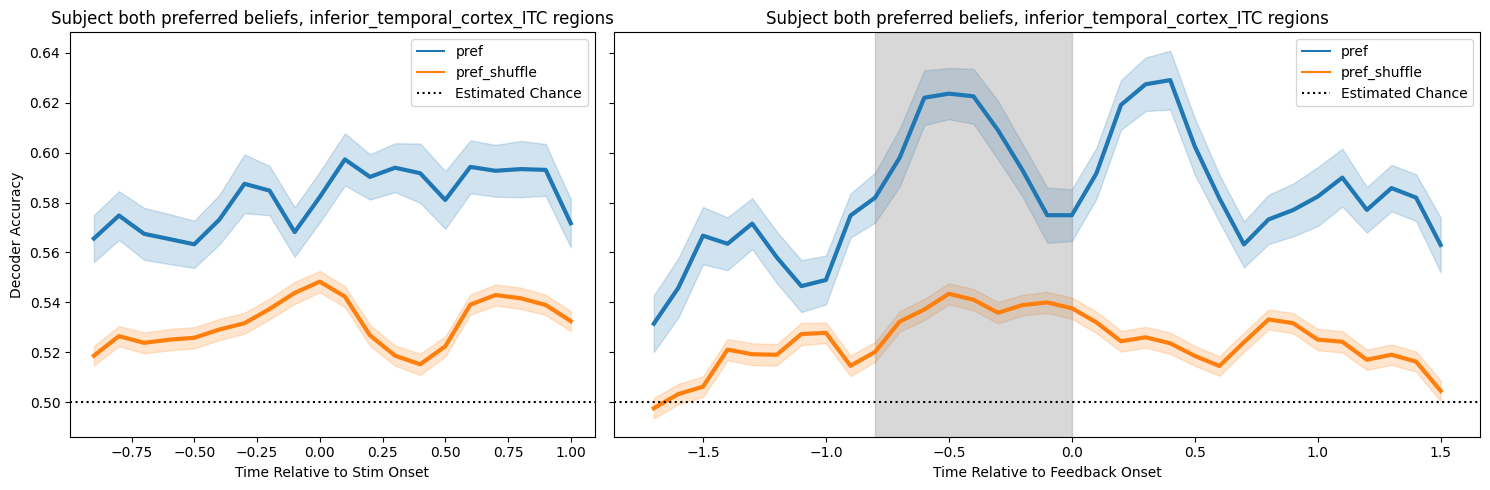

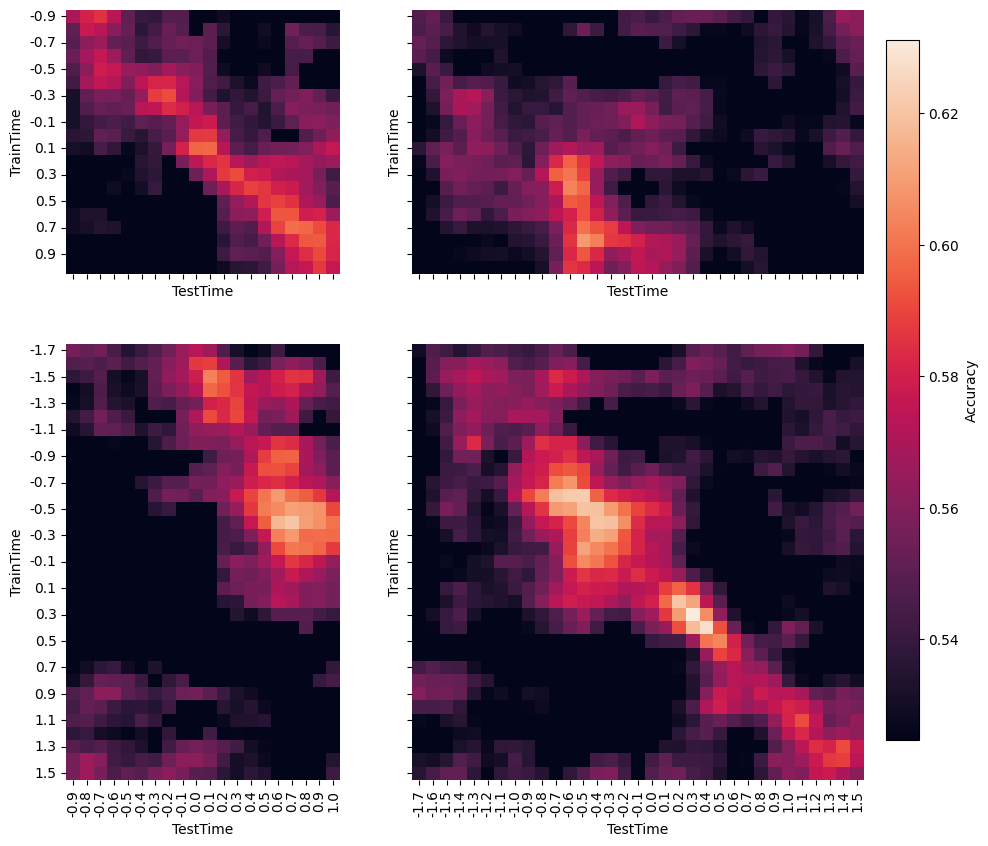

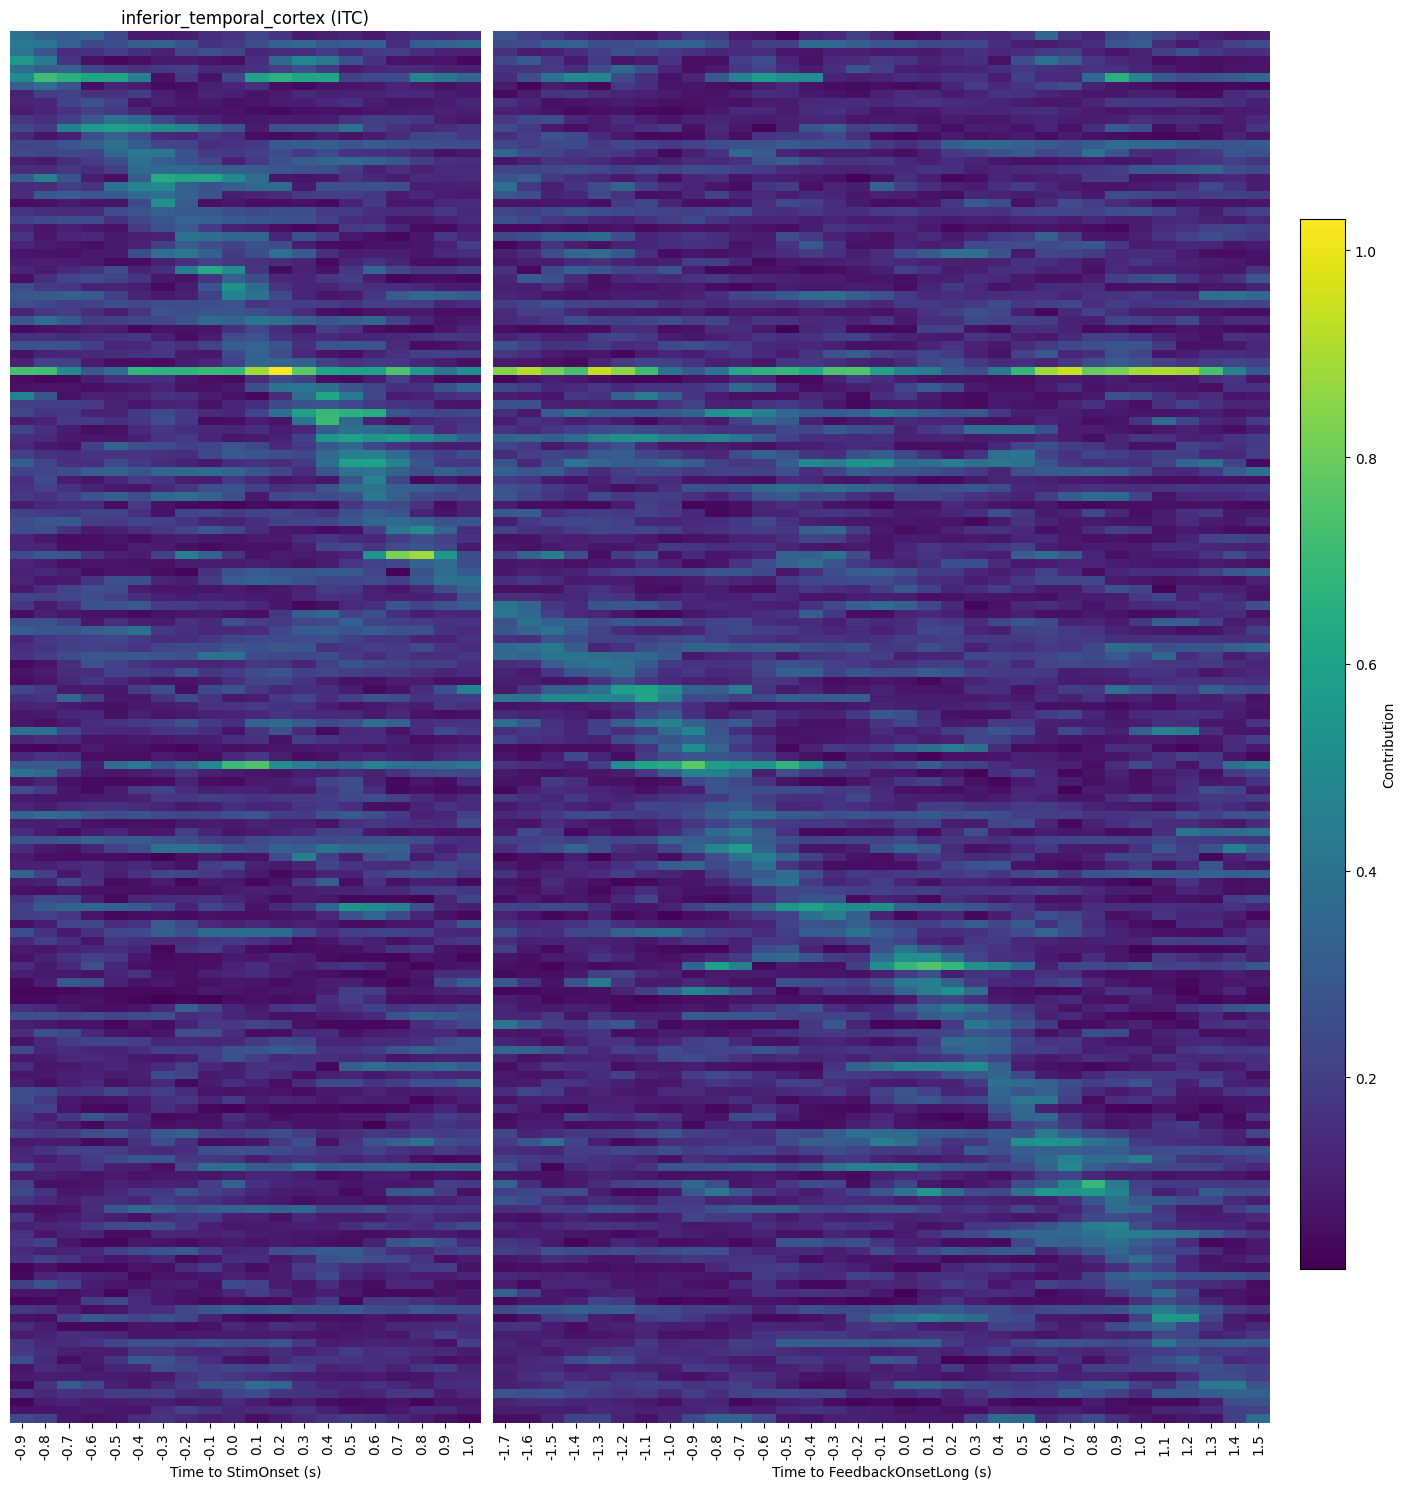

In [44]:
args.mode = "pref"
args.sig_unit_level = pref_sig_unit_level

visualization_utils.plot_combined_accs(args)
visualization_utils.plot_combined_cross_accs(args)
plot_weights(args)



#### Conf

Warning, shuffle not found: YELLOW_conf_shuffle_9
Warning, shuffle not found: YELLOW_conf_shuffle_9
0.6939322916666667


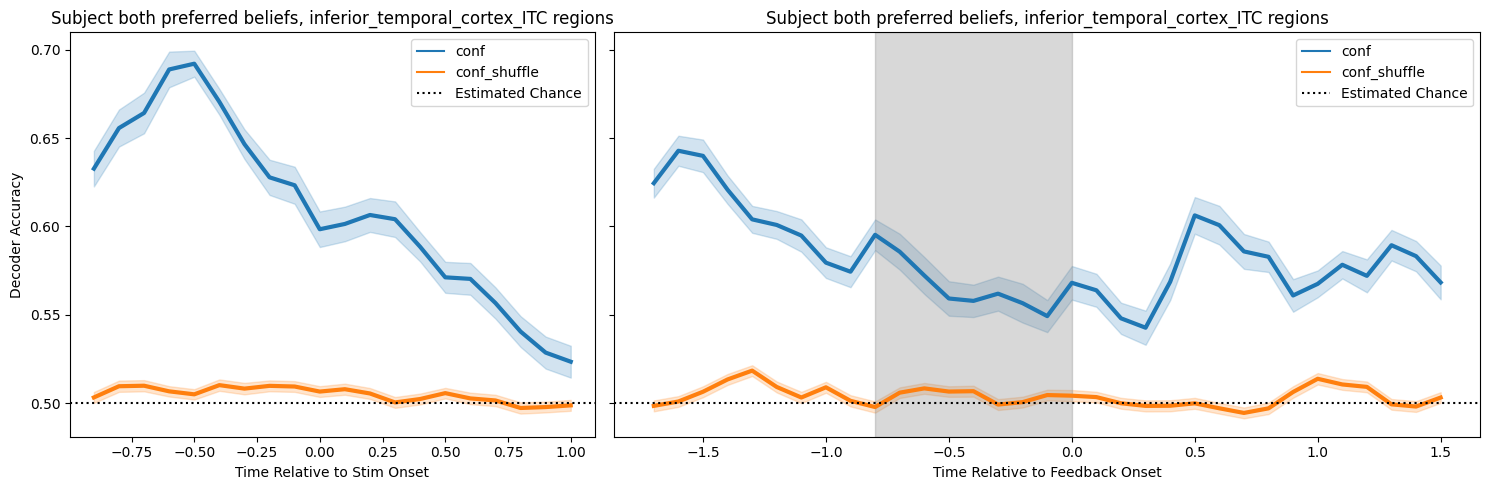

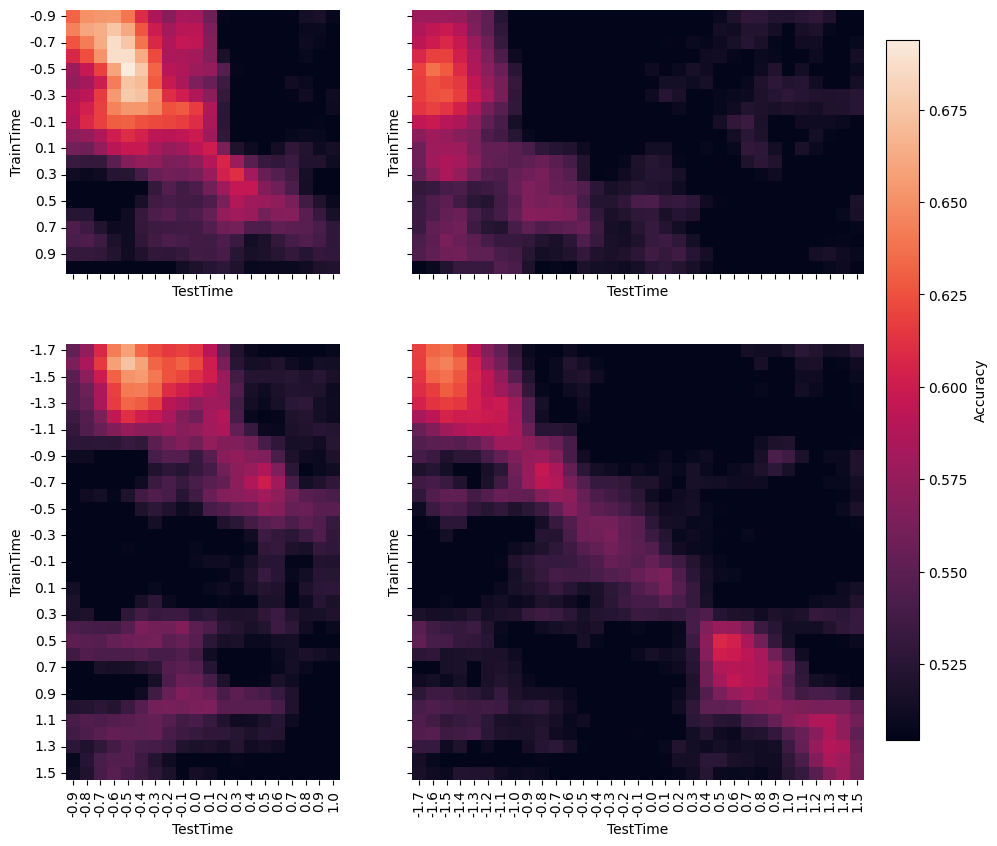

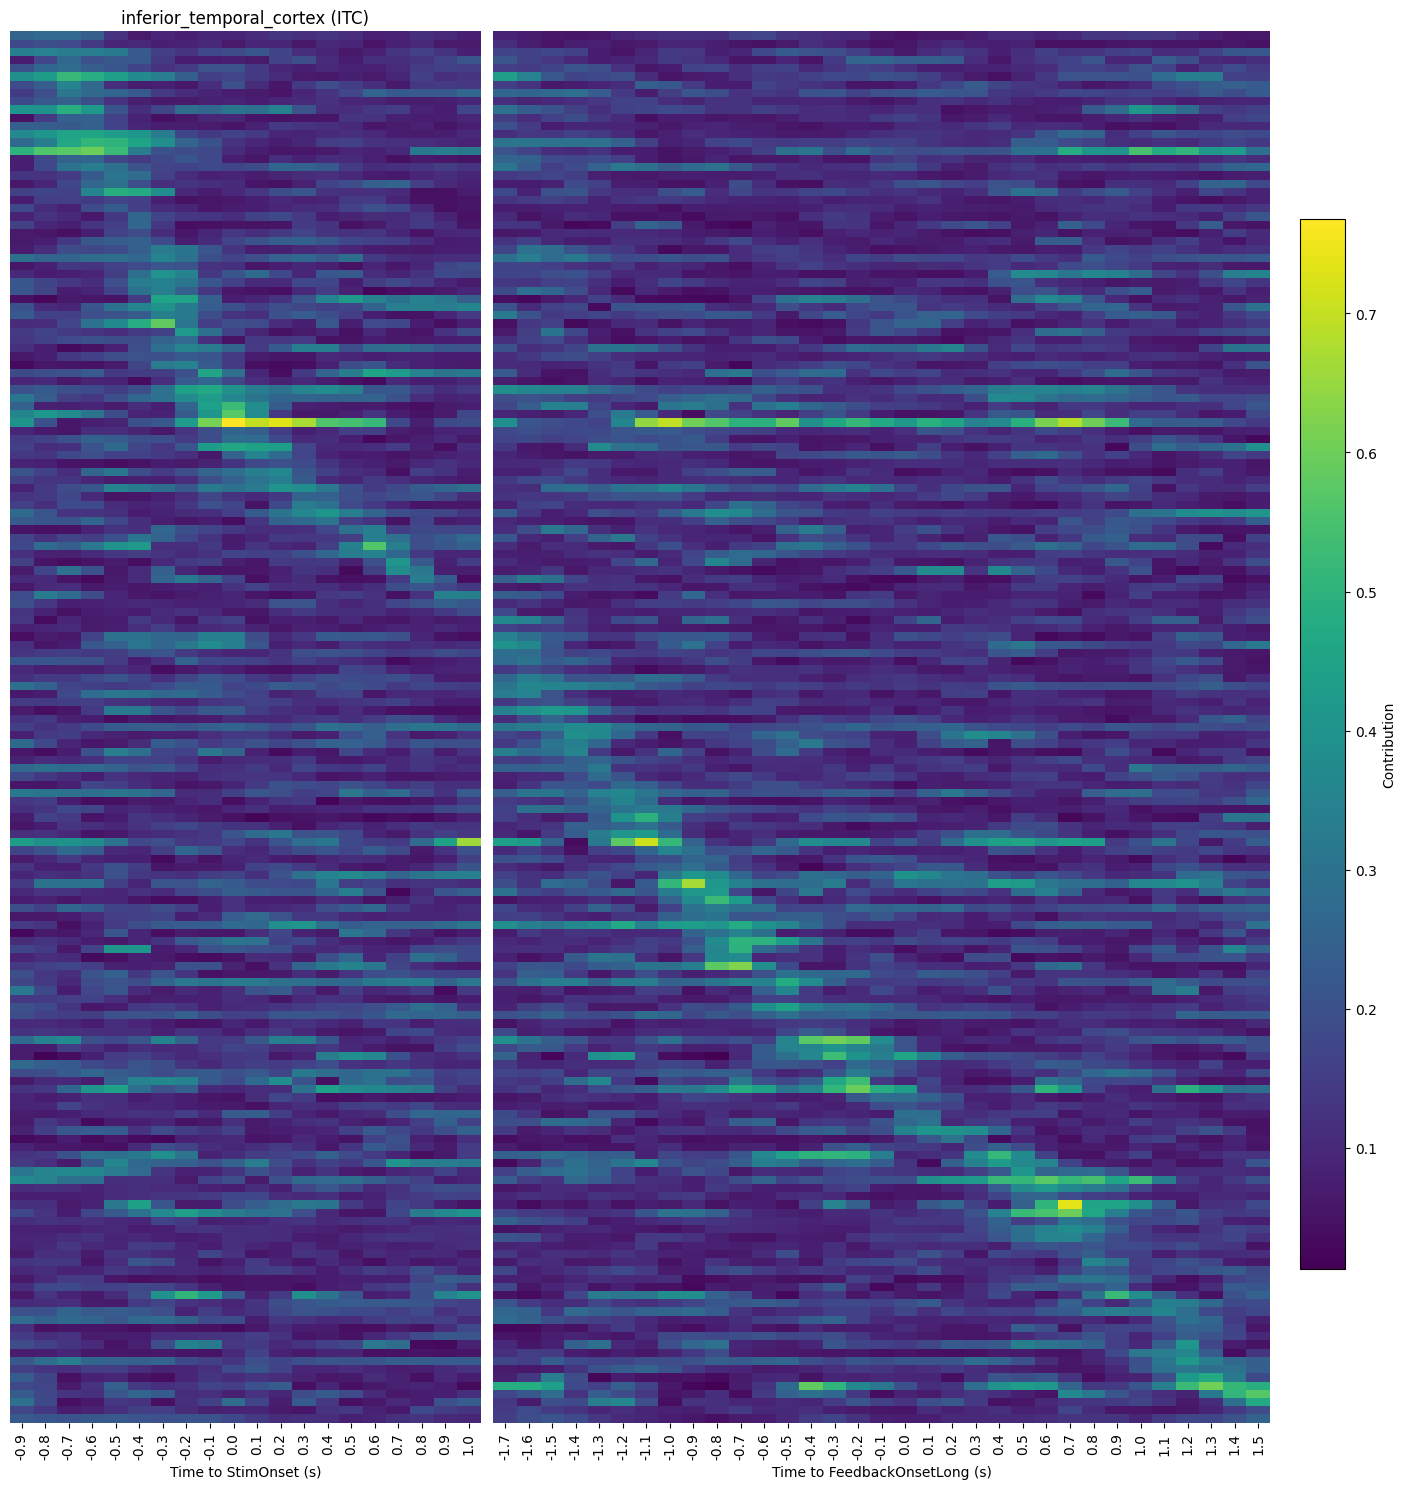

In [45]:
args.mode = "conf"
args.sig_unit_level = conf_sig_unit_level

visualization_utils.plot_combined_accs(args)
visualization_utils.plot_combined_cross_accs(args)
plot_weights(args)



#### Cosine sim bewtween conf and pref

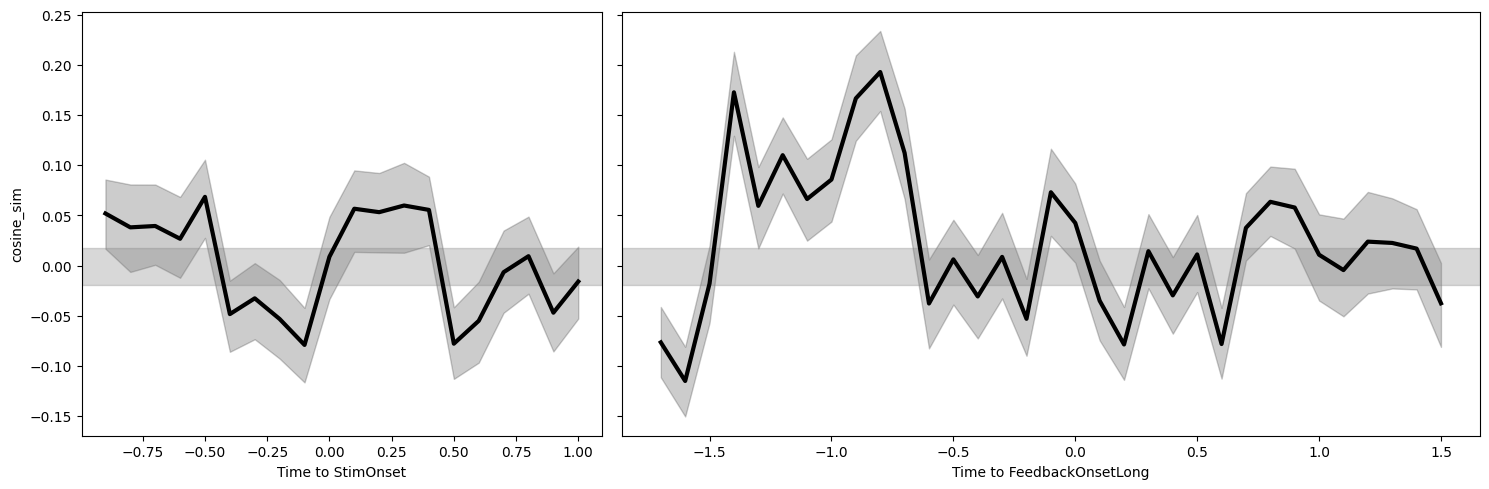

In [46]:
visualization_utils.plot_cosine_sim_between_conf_pref(args)

## Basal Ganglia

In [47]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.subject = "both"
args.region_level = "structure_level2_cleaned"
args.regions = "basal_ganglia_BG"

#### Pref

Warning, shuffle not found: YELLOW_pref_shuffle_2
Warning, shuffle not found: YELLOW_pref_shuffle_3
Warning, shuffle not found: MAGENTA_pref_shuffle_4
Warning, shuffle not found: YELLOW_pref_shuffle_4
Warning, shuffle not found: CIRCLE_pref_shuffle_5
Warning, shuffle not found: YELLOW_pref_shuffle_6
Warning, shuffle not found: YELLOW_pref_shuffle_7
Warning, shuffle not found: YELLOW_pref_shuffle_9
Warning, shuffle not found: YELLOW_pref_shuffle_2
Warning, shuffle not found: YELLOW_pref_shuffle_3
Warning, shuffle not found: MAGENTA_pref_shuffle_4
Warning, shuffle not found: YELLOW_pref_shuffle_4
Warning, shuffle not found: CIRCLE_pref_shuffle_5
Warning, shuffle not found: YELLOW_pref_shuffle_6
Warning, shuffle not found: YELLOW_pref_shuffle_7
Warning, shuffle not found: YELLOW_pref_shuffle_9
Warning, shuffle not found: YELLOW_pref_shuffle_2
Warning, shuffle not found: YELLOW_pref_shuffle_3
Warning, shuffle not found: MAGENTA_pref_shuffle_4
Warning, shuffle not found: YELLOW_pref_shuffle

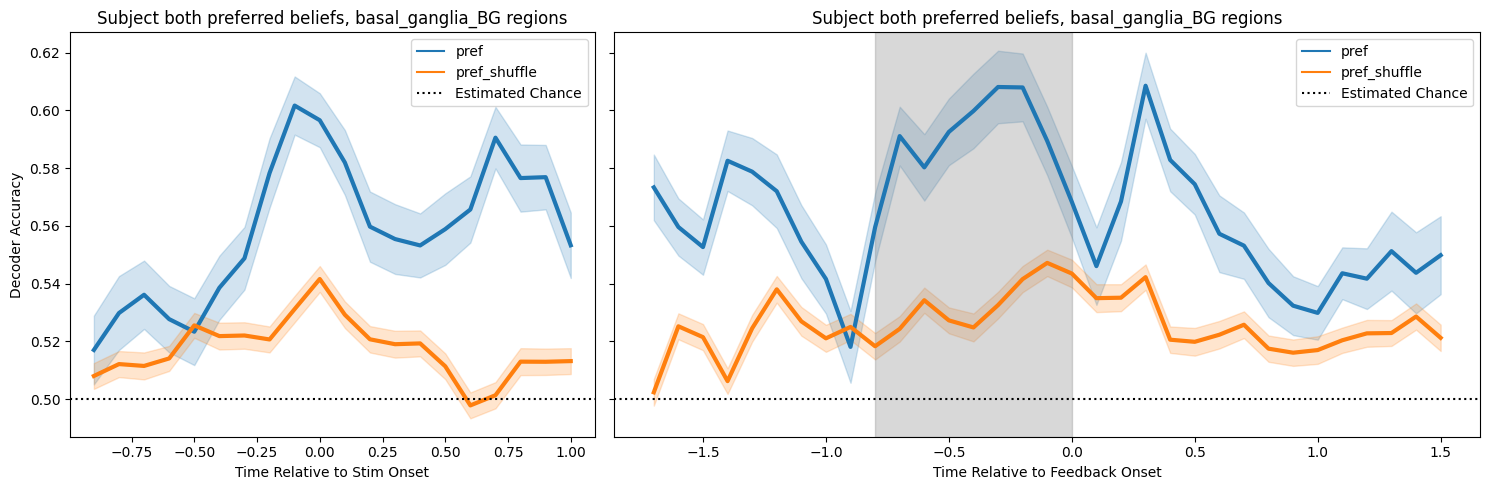

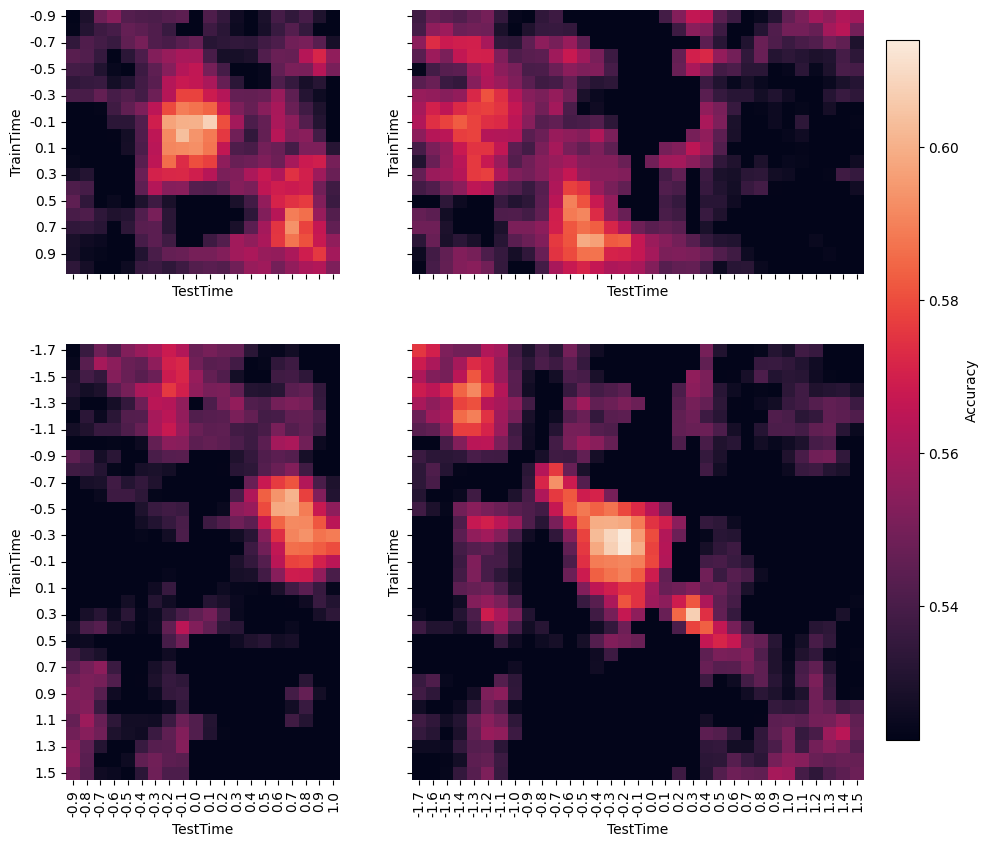

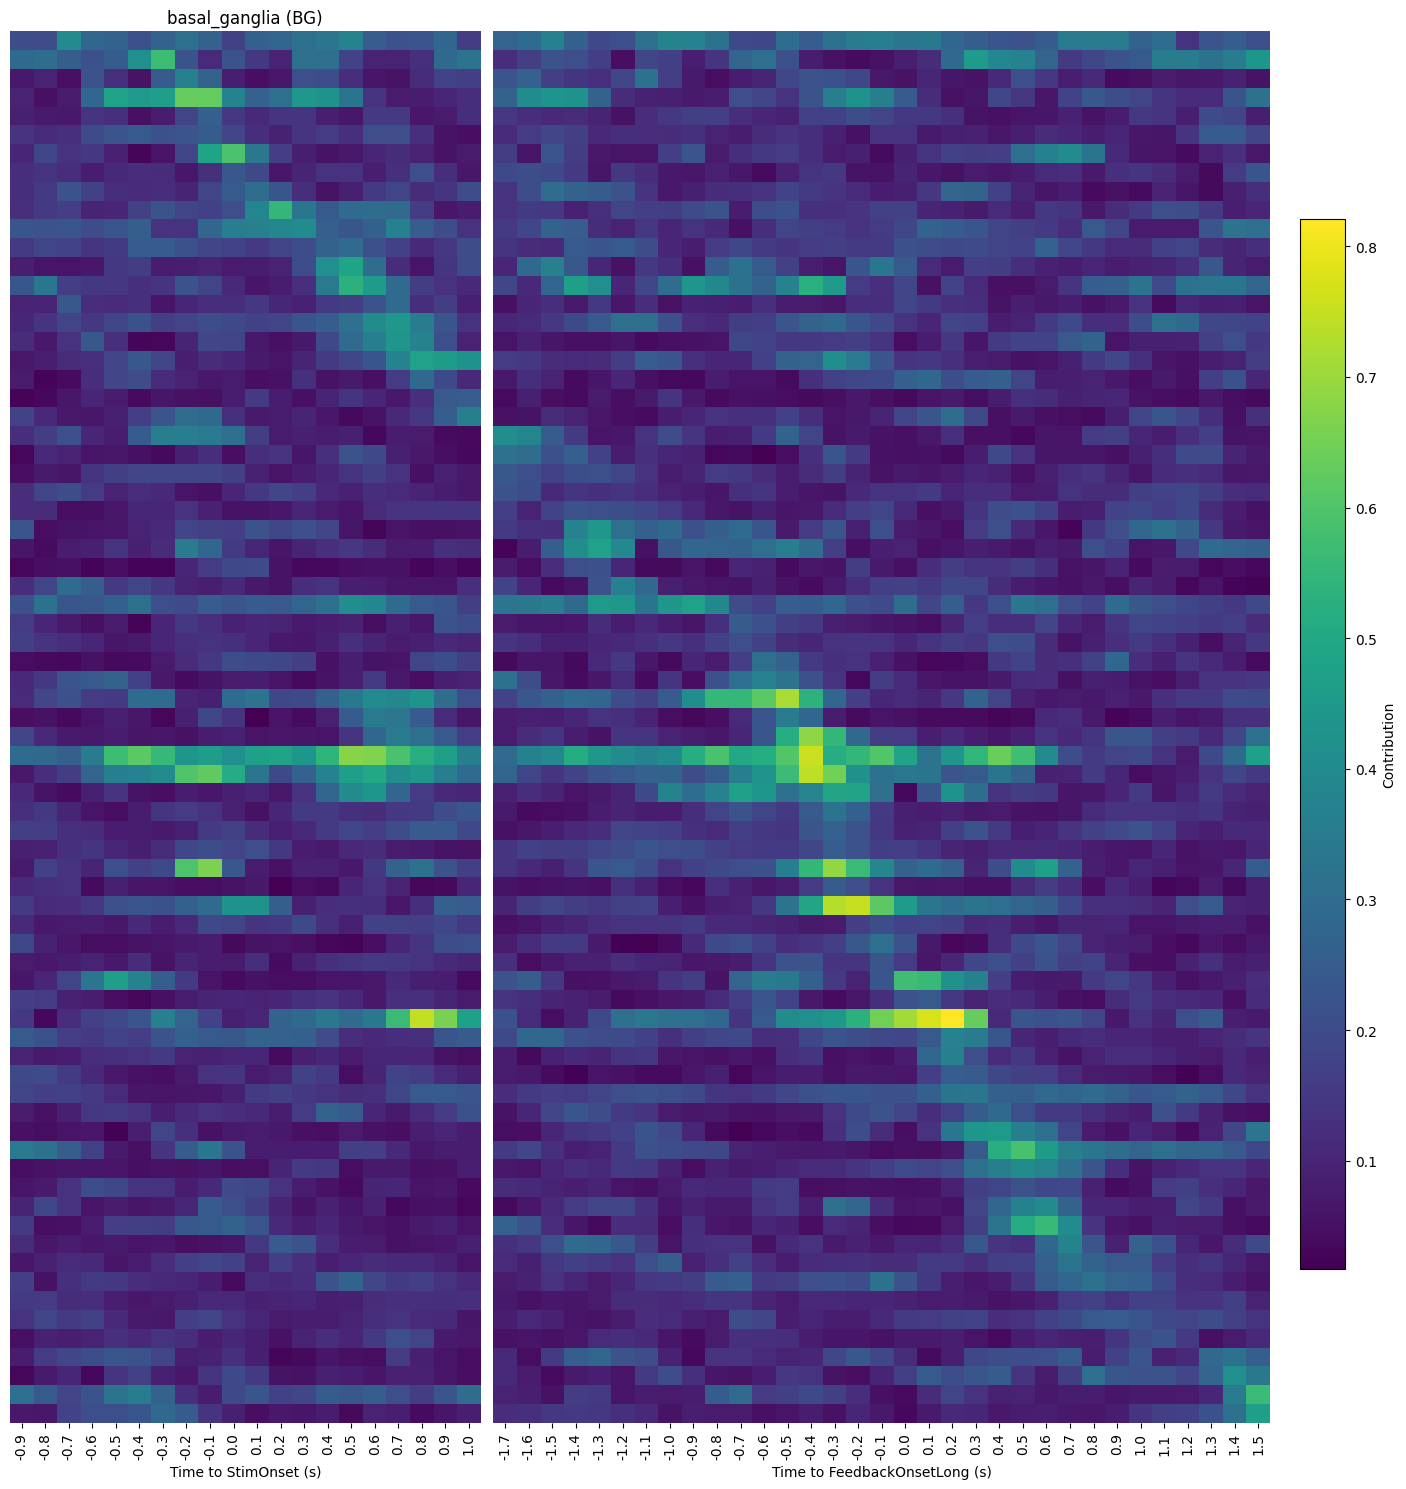

In [48]:
args.mode = "pref"
args.sig_unit_level = pref_sig_unit_level

visualization_utils.plot_combined_accs(args)
visualization_utils.plot_combined_cross_accs(args)
plot_weights(args)


#### Conf

Warning, shuffle not found: MAGENTA_conf_shuffle_4
Warning, shuffle not found: YELLOW_conf_shuffle_8
Warning, shuffle not found: SWIRL_conf_shuffle_8
Warning, shuffle not found: MAGENTA_conf_shuffle_4
Warning, shuffle not found: YELLOW_conf_shuffle_8
Warning, shuffle not found: SWIRL_conf_shuffle_8


0.677578125


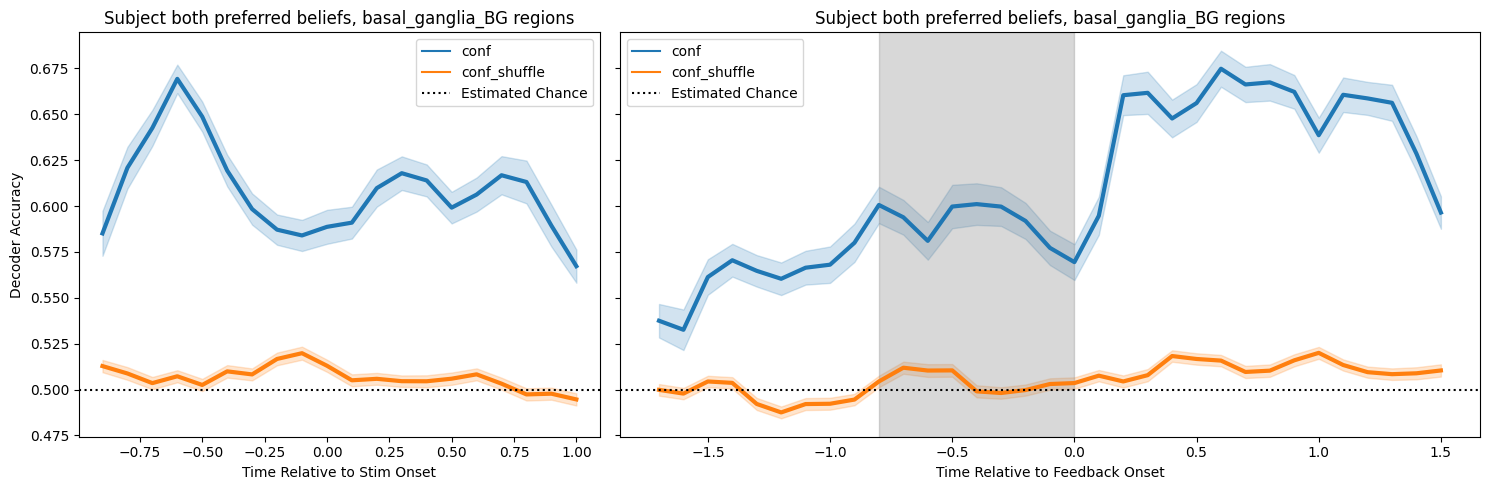

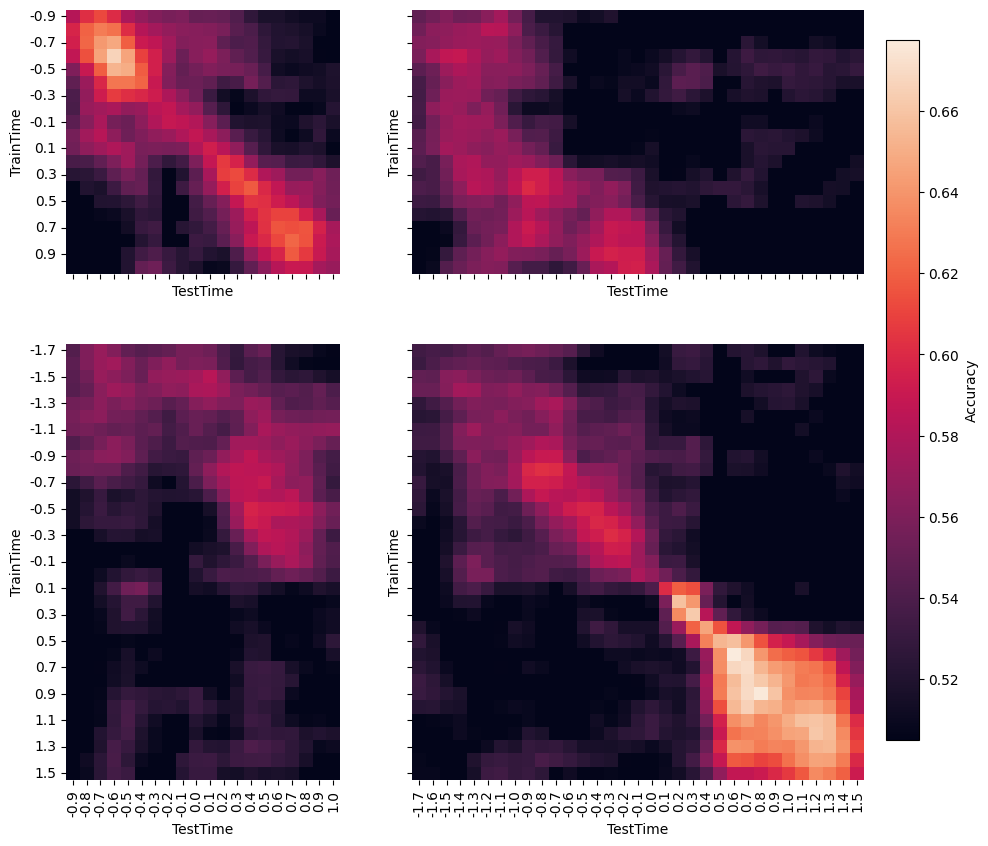

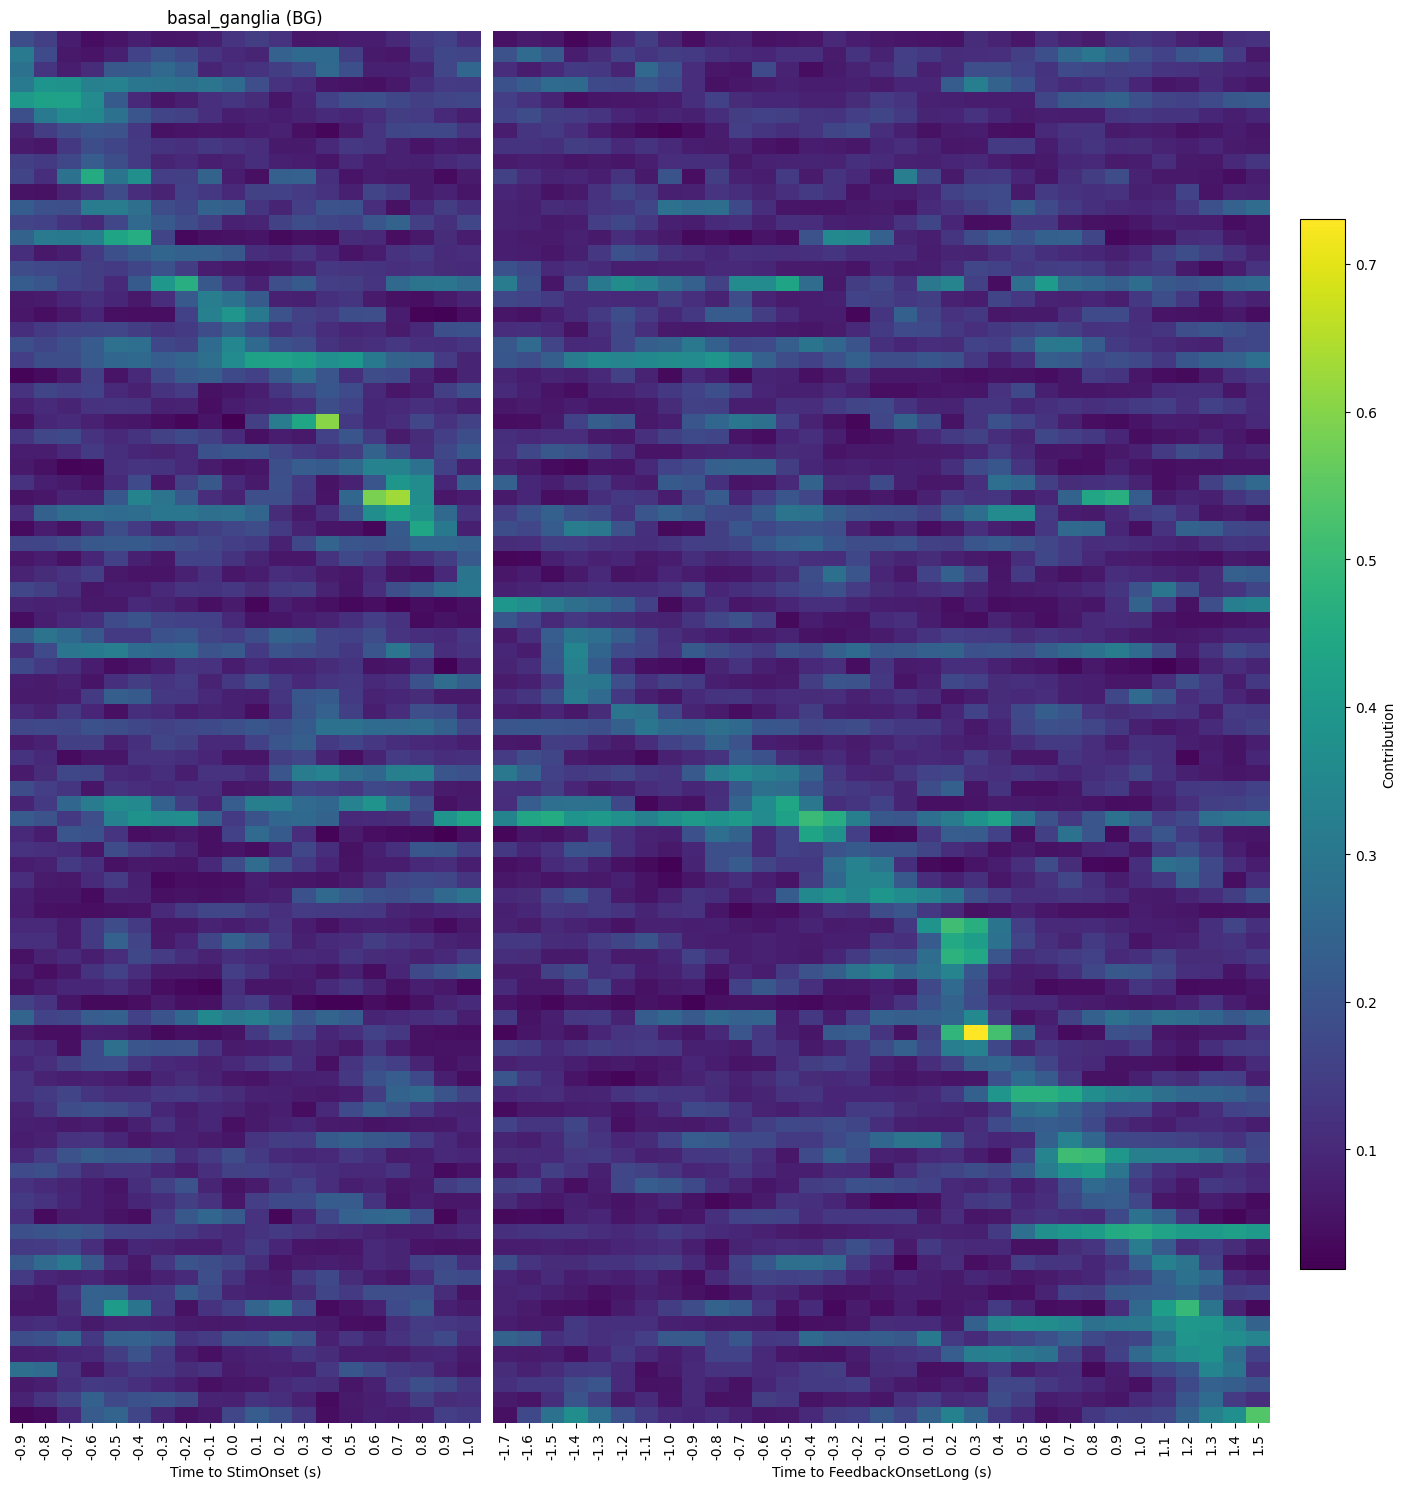

In [49]:
args.mode = "conf"
args.sig_unit_level = conf_sig_unit_level

visualization_utils.plot_combined_accs(args)
visualization_utils.plot_combined_cross_accs(args)
plot_weights(args)


#### Cosine sim between conf and pref

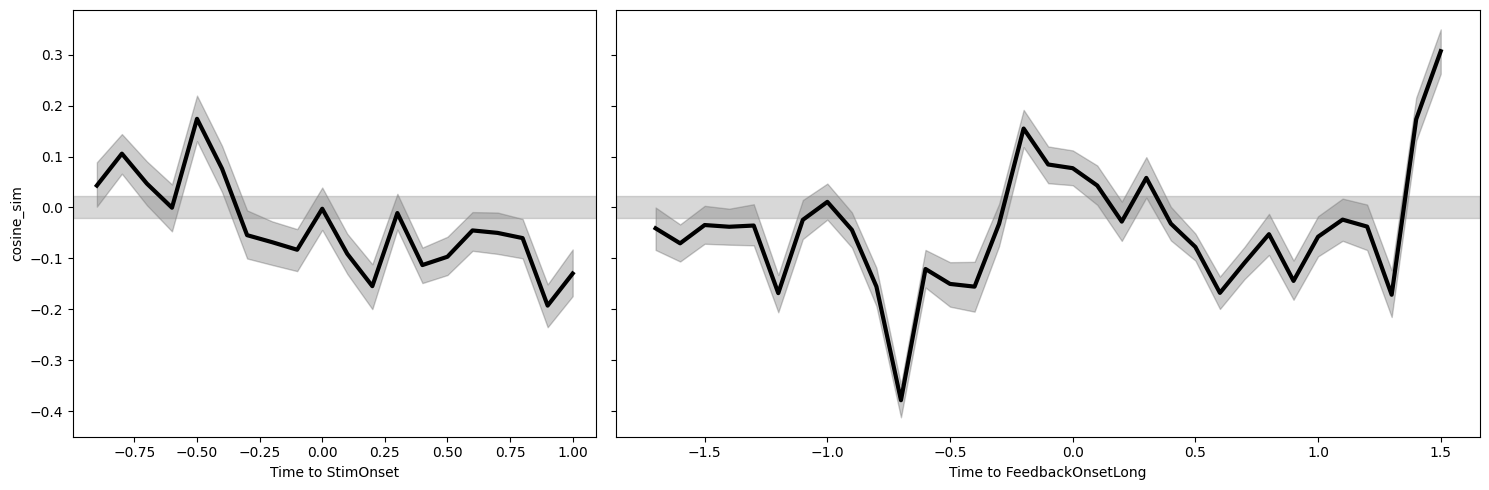

In [50]:
visualization_utils.plot_cosine_sim_between_conf_pref(args)

## Amygdala

In [51]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.subject = "both"
args.region_level = "structure_level2_cleaned"
args.regions = "amygdala_Amy"

#### Pref

Warning, shuffle not found: YELLOW_pref_shuffle_2
Warning, shuffle not found: YELLOW_pref_shuffle_3
Warning, shuffle not found: MAGENTA_pref_shuffle_4
Warning, shuffle not found: YELLOW_pref_shuffle_4
Warning, shuffle not found: YELLOW_pref_shuffle_6
Warning, shuffle not found: YELLOW_pref_shuffle_7
Warning, shuffle not found: YELLOW_pref_shuffle_9


Warning, shuffle not found: YELLOW_pref_shuffle_2
Warning, shuffle not found: YELLOW_pref_shuffle_3
Warning, shuffle not found: MAGENTA_pref_shuffle_4
Warning, shuffle not found: YELLOW_pref_shuffle_4
Warning, shuffle not found: YELLOW_pref_shuffle_6
Warning, shuffle not found: YELLOW_pref_shuffle_7
Warning, shuffle not found: YELLOW_pref_shuffle_9
Warning, shuffle not found: YELLOW_pref_shuffle_2
Warning, shuffle not found: YELLOW_pref_shuffle_3
Warning, shuffle not found: MAGENTA_pref_shuffle_4
Warning, shuffle not found: YELLOW_pref_shuffle_4
Warning, shuffle not found: YELLOW_pref_shuffle_6
Warning, shuffle not found: YELLOW_pref_shuffle_7
Warning, shuffle not found: YELLOW_pref_shuffle_9
Warning, shuffle not found: YELLOW_pref_shuffle_2
Warning, shuffle not found: YELLOW_pref_shuffle_3
Warning, shuffle not found: MAGENTA_pref_shuffle_4
Warning, shuffle not found: YELLOW_pref_shuffle_4
Warning, shuffle not found: YELLOW_pref_shuffle_6
Warning, shuffle not found: YELLOW_pref_shuffle

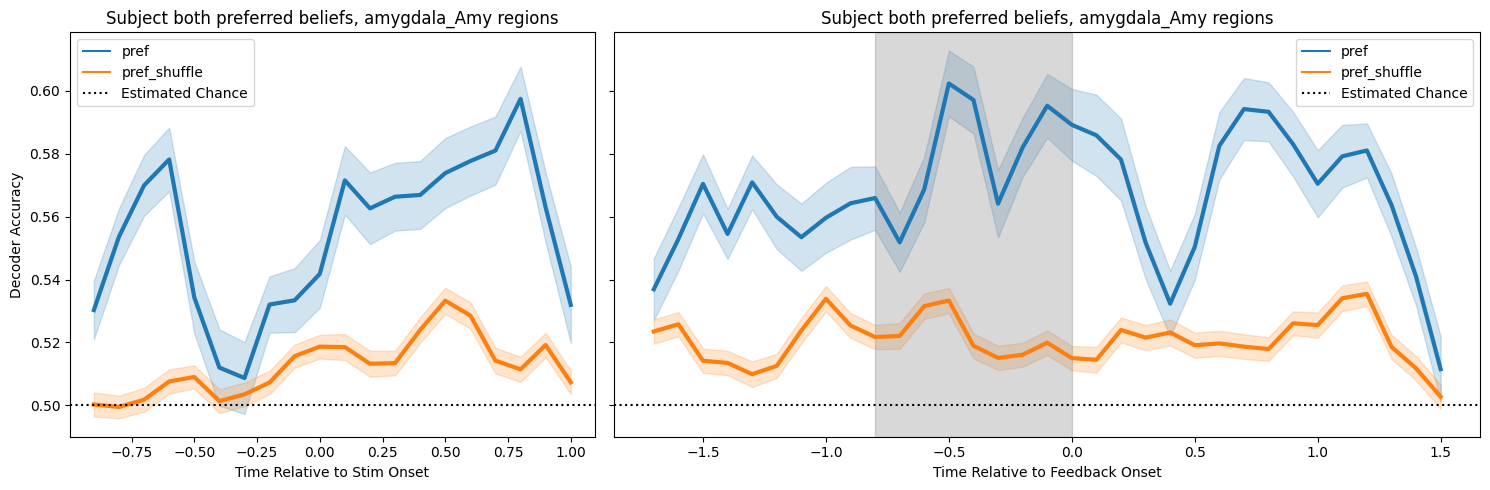

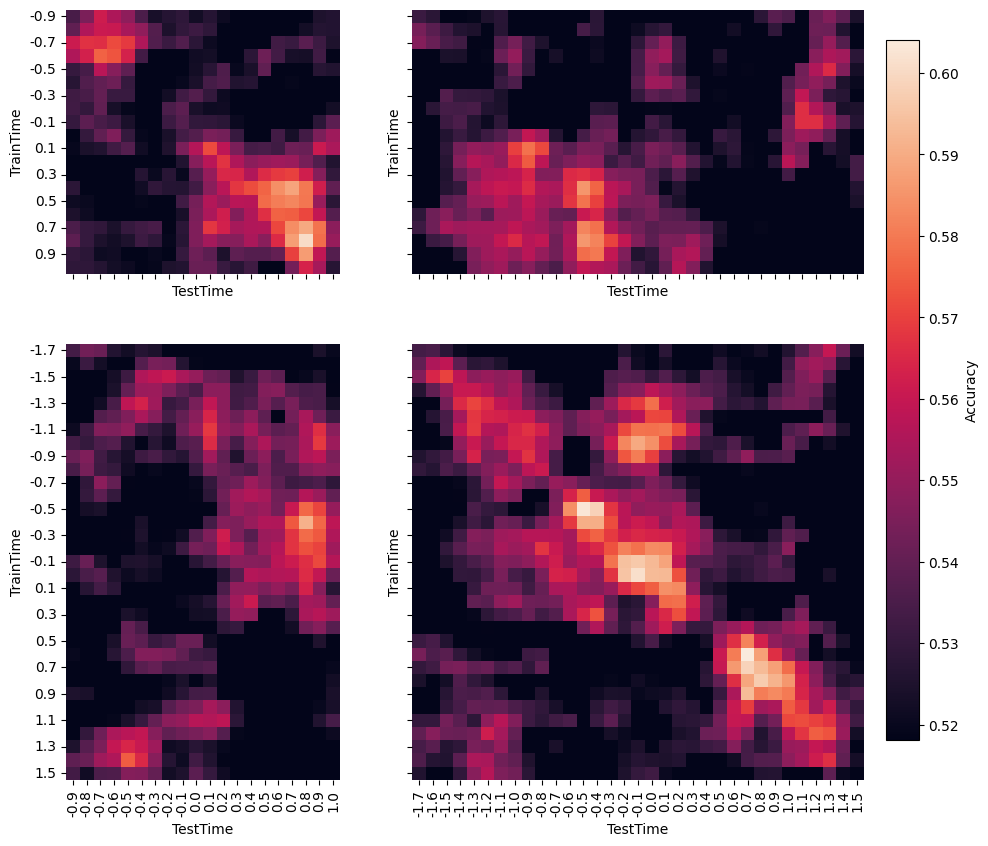

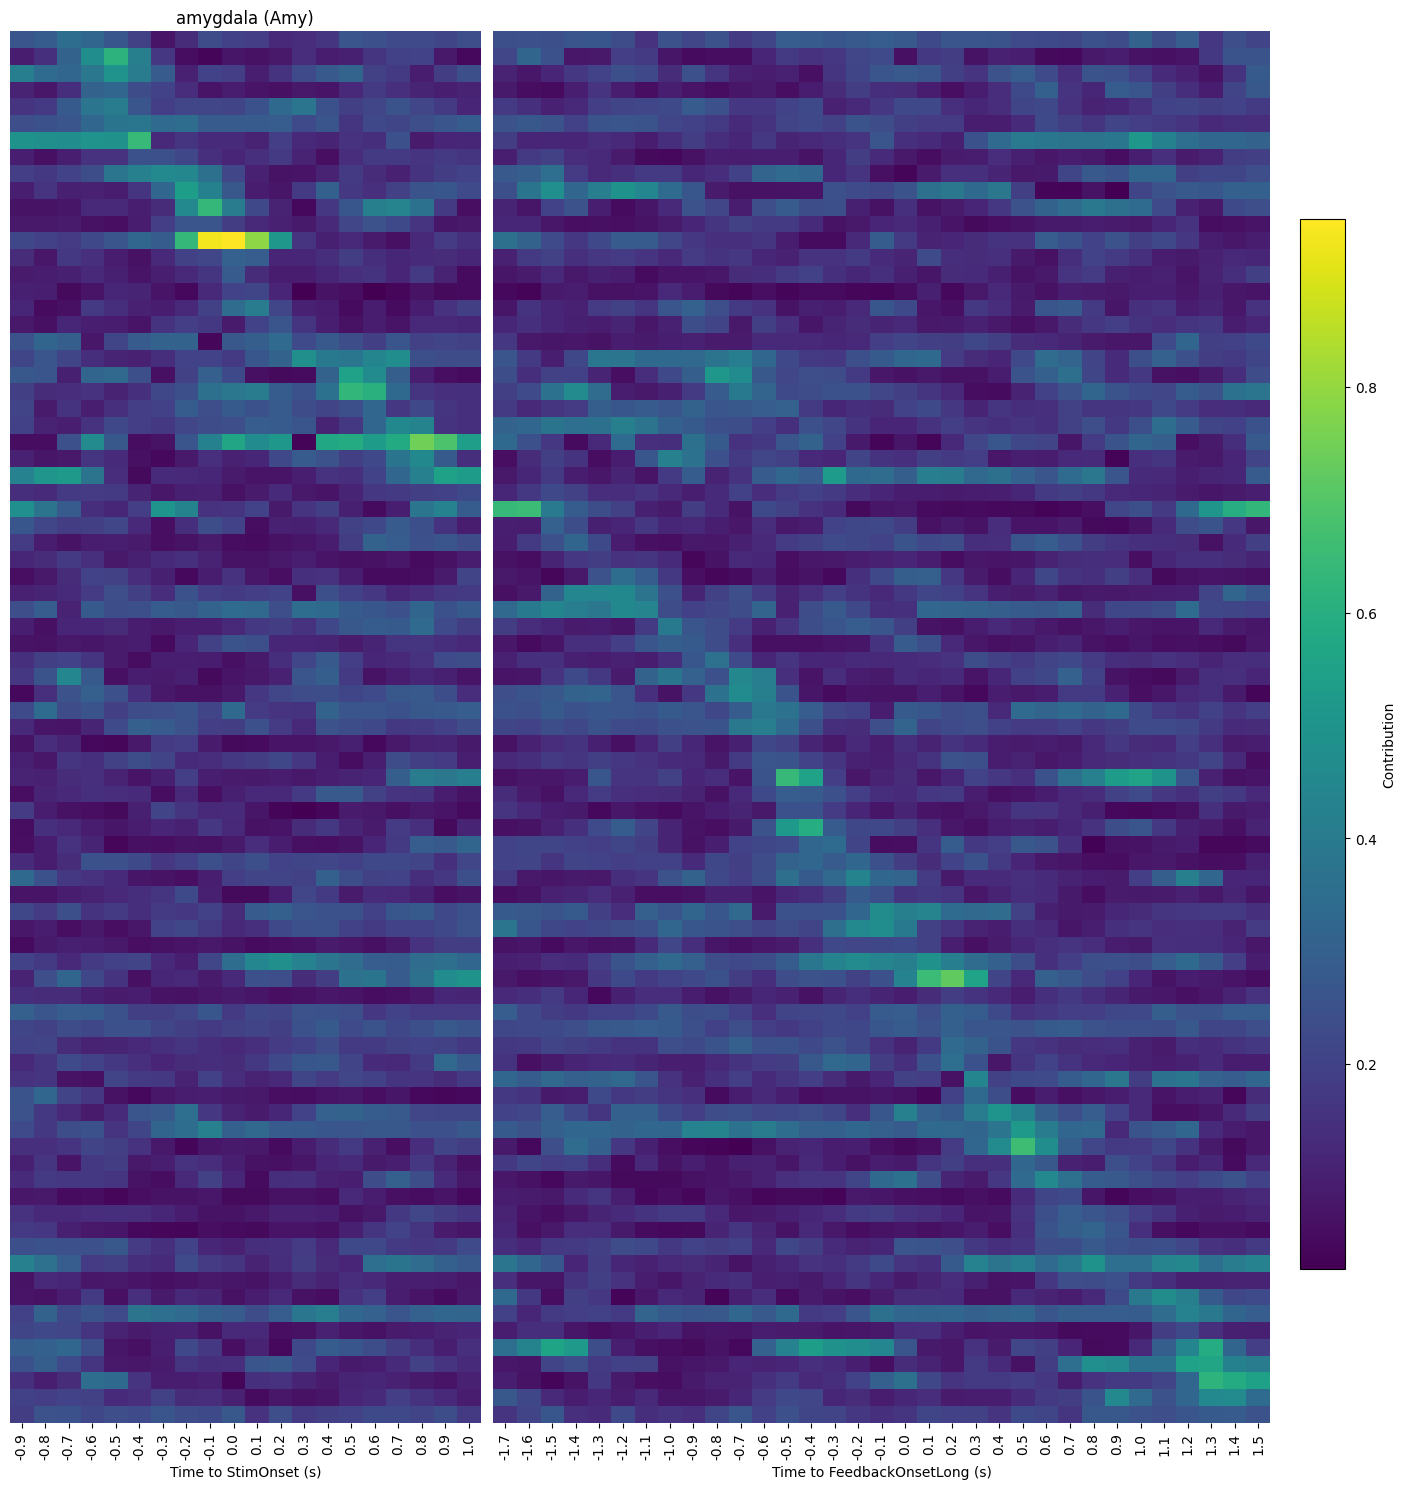

In [52]:
args.mode = "pref"
args.sig_unit_level = pref_sig_unit_level
visualization_utils.plot_combined_accs(args)
visualization_utils.plot_combined_cross_accs(args)
plot_weights(args)


#### Conf

0.6546354166666667


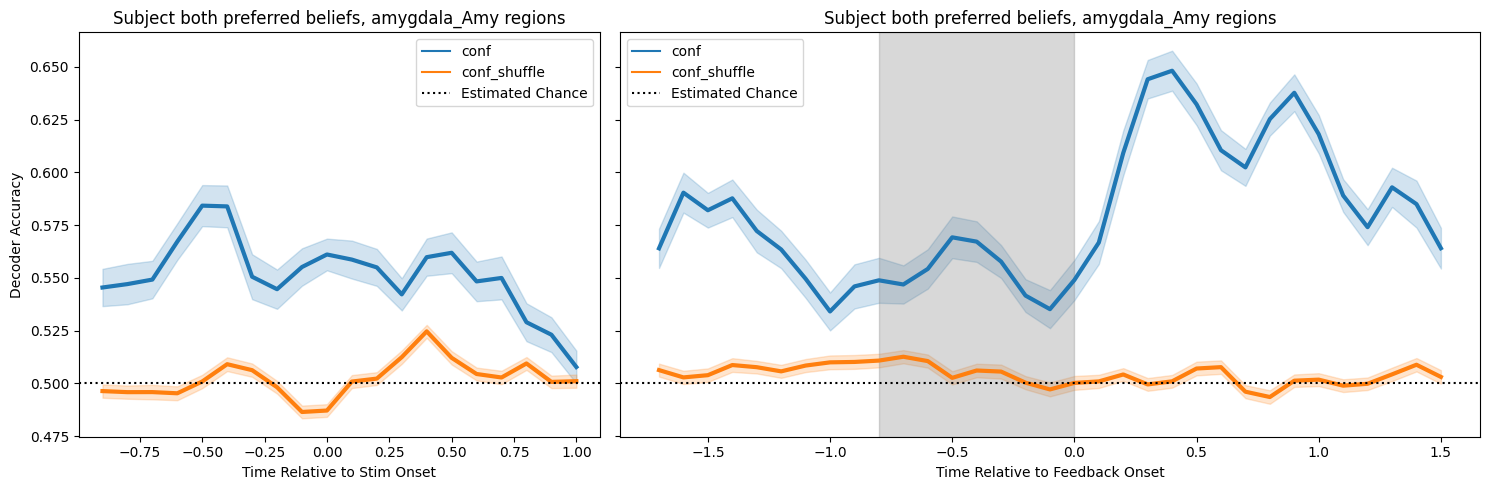

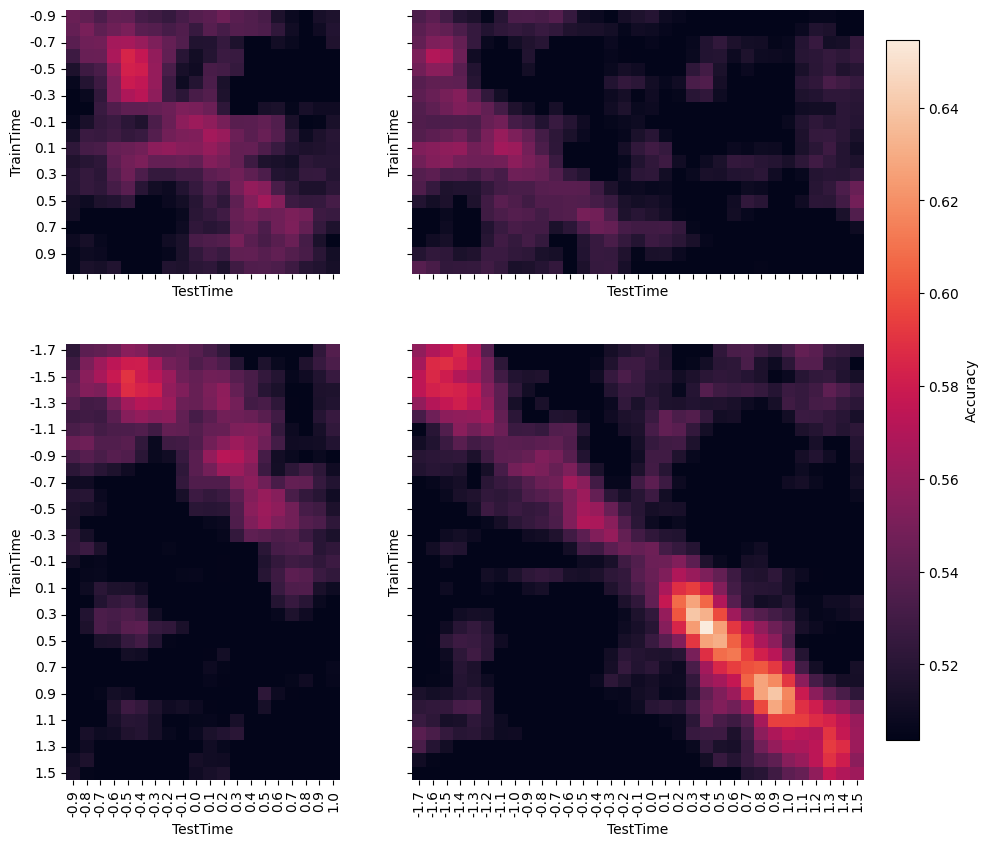

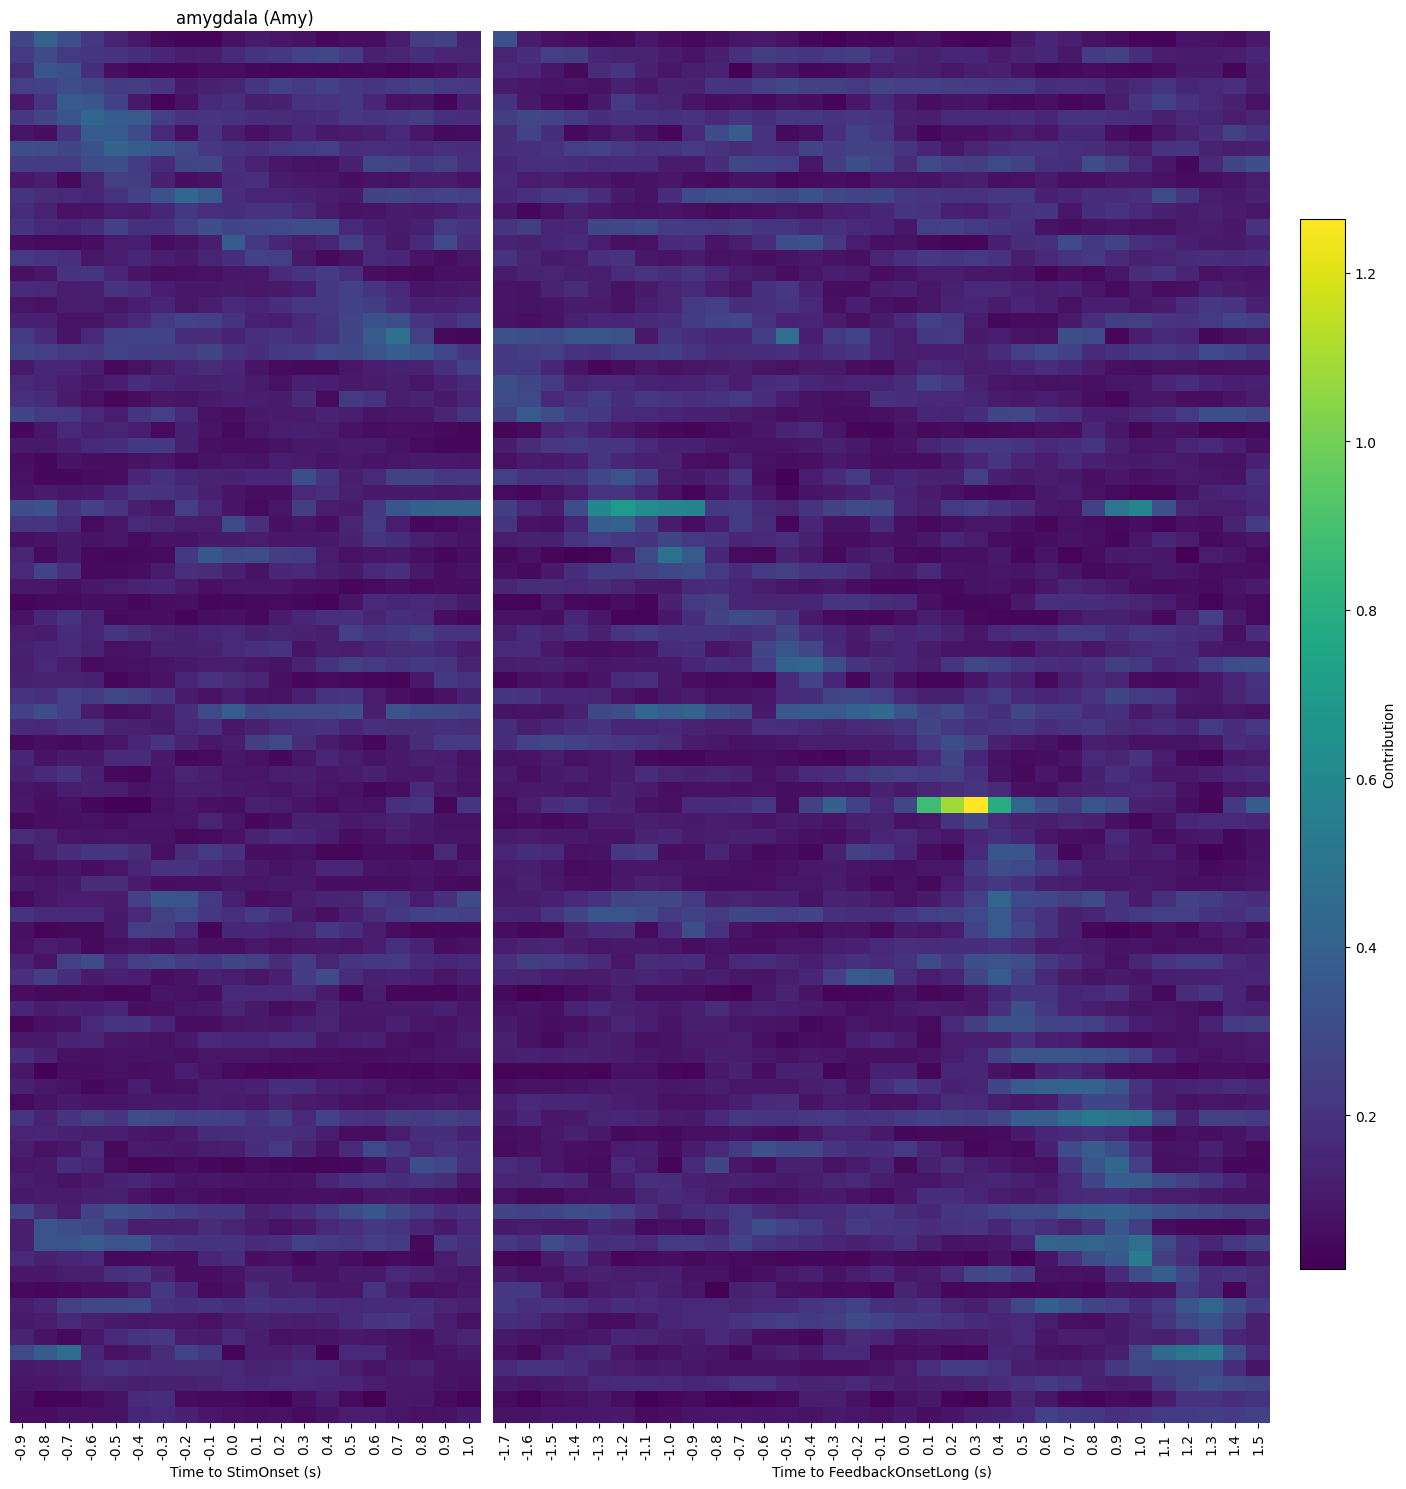

In [54]:
args.mode = "conf"
args.sig_unit_level = conf_sig_unit_level


visualization_utils.plot_combined_accs(args)
visualization_utils.plot_combined_cross_accs(args)
plot_weights(args)


#### Cosine sim between conf and pref

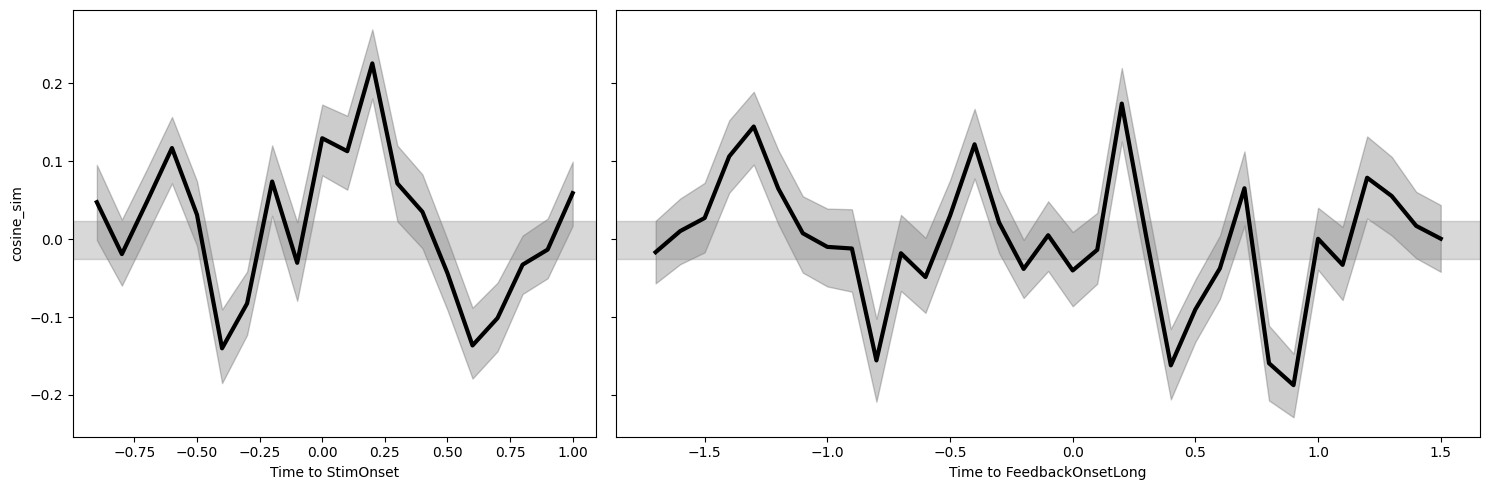

In [55]:
visualization_utils.plot_cosine_sim_between_conf_pref(args)

## Lat PFC

In [58]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.subject = "both"
args.region_level = "structure_level2_cleaned"
args.regions = "lateral_prefrontal_cortex_lat_PFC"

### Pref

Warning, shuffle not found: YELLOW_pref_shuffle_2
Warning, shuffle not found: YELLOW_pref_shuffle_3
Warning, shuffle not found: MAGENTA_pref_shuffle_4
Warning, shuffle not found: YELLOW_pref_shuffle_4
Warning, shuffle not found: CIRCLE_pref_shuffle_5
Warning, shuffle not found: YELLOW_pref_shuffle_6
Warning, shuffle not found: YELLOW_pref_shuffle_7
Warning, shuffle not found: YELLOW_pref_shuffle_9


Warning, shuffle not found: YELLOW_pref_shuffle_2
Warning, shuffle not found: YELLOW_pref_shuffle_3
Warning, shuffle not found: MAGENTA_pref_shuffle_4
Warning, shuffle not found: YELLOW_pref_shuffle_4
Warning, shuffle not found: CIRCLE_pref_shuffle_5
Warning, shuffle not found: YELLOW_pref_shuffle_6
Warning, shuffle not found: YELLOW_pref_shuffle_7
Warning, shuffle not found: YELLOW_pref_shuffle_9
Warning, shuffle not found: YELLOW_pref_shuffle_2
Warning, shuffle not found: YELLOW_pref_shuffle_3
Warning, shuffle not found: MAGENTA_pref_shuffle_4
Warning, shuffle not found: YELLOW_pref_shuffle_4
Warning, shuffle not found: CIRCLE_pref_shuffle_5
Warning, shuffle not found: YELLOW_pref_shuffle_6
Warning, shuffle not found: YELLOW_pref_shuffle_7
Warning, shuffle not found: YELLOW_pref_shuffle_9
Warning, shuffle not found: YELLOW_pref_shuffle_2
Warning, shuffle not found: YELLOW_pref_shuffle_3
Warning, shuffle not found: MAGENTA_pref_shuffle_4
Warning, shuffle not found: YELLOW_pref_shuffle

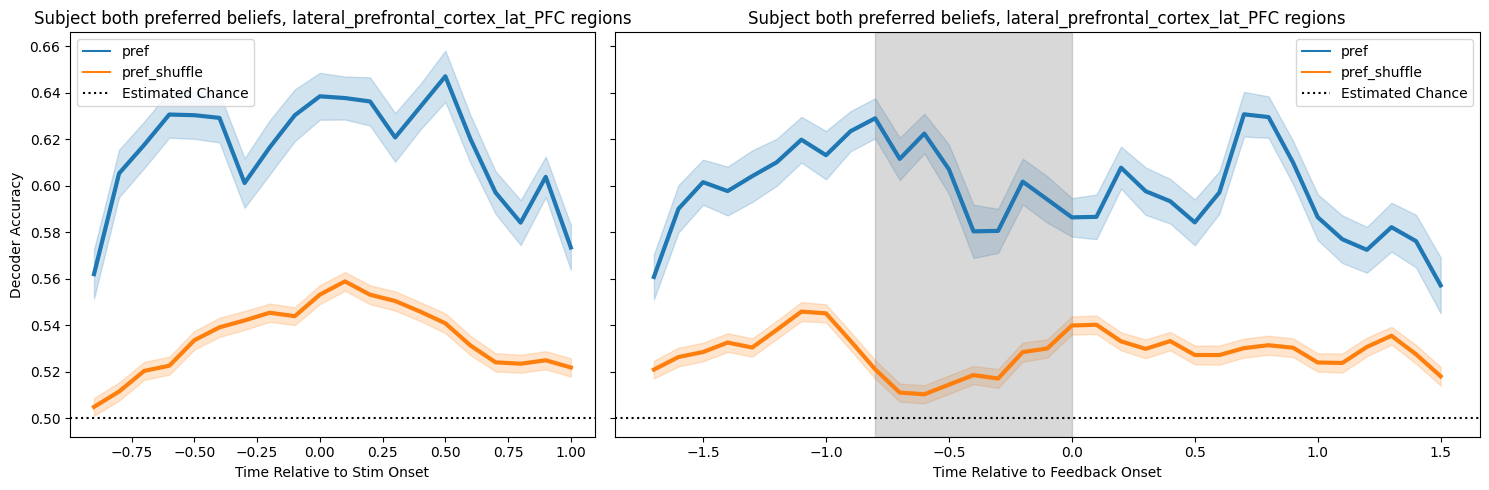

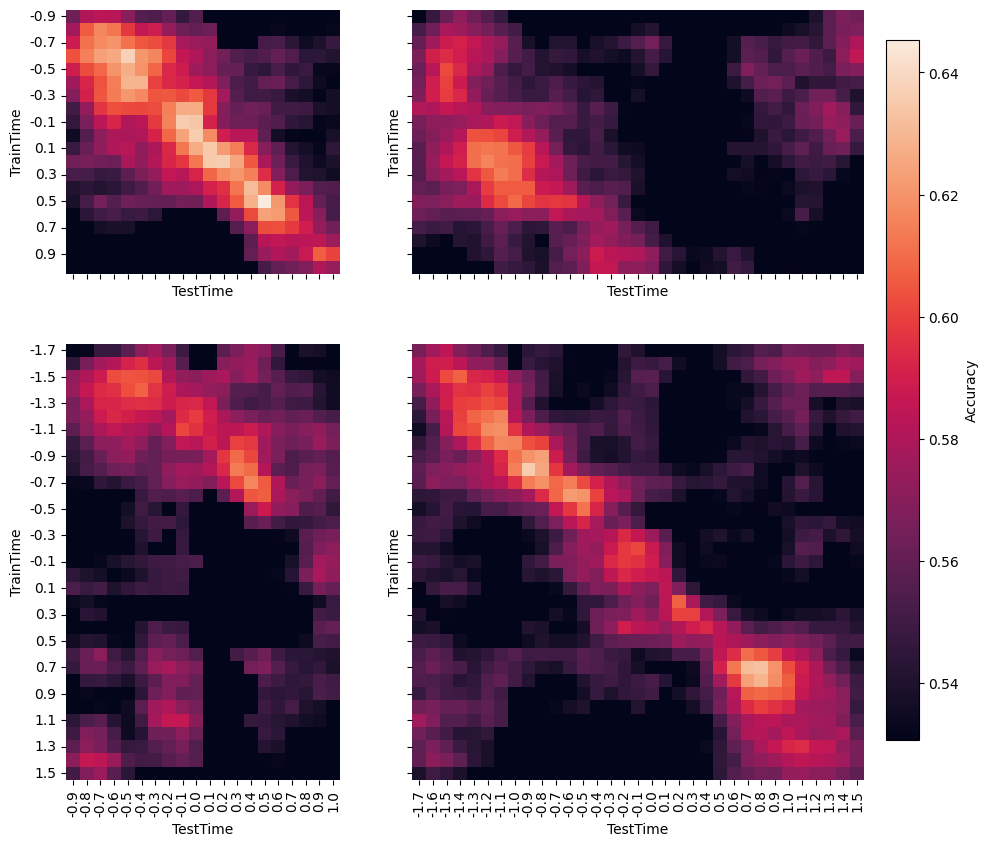

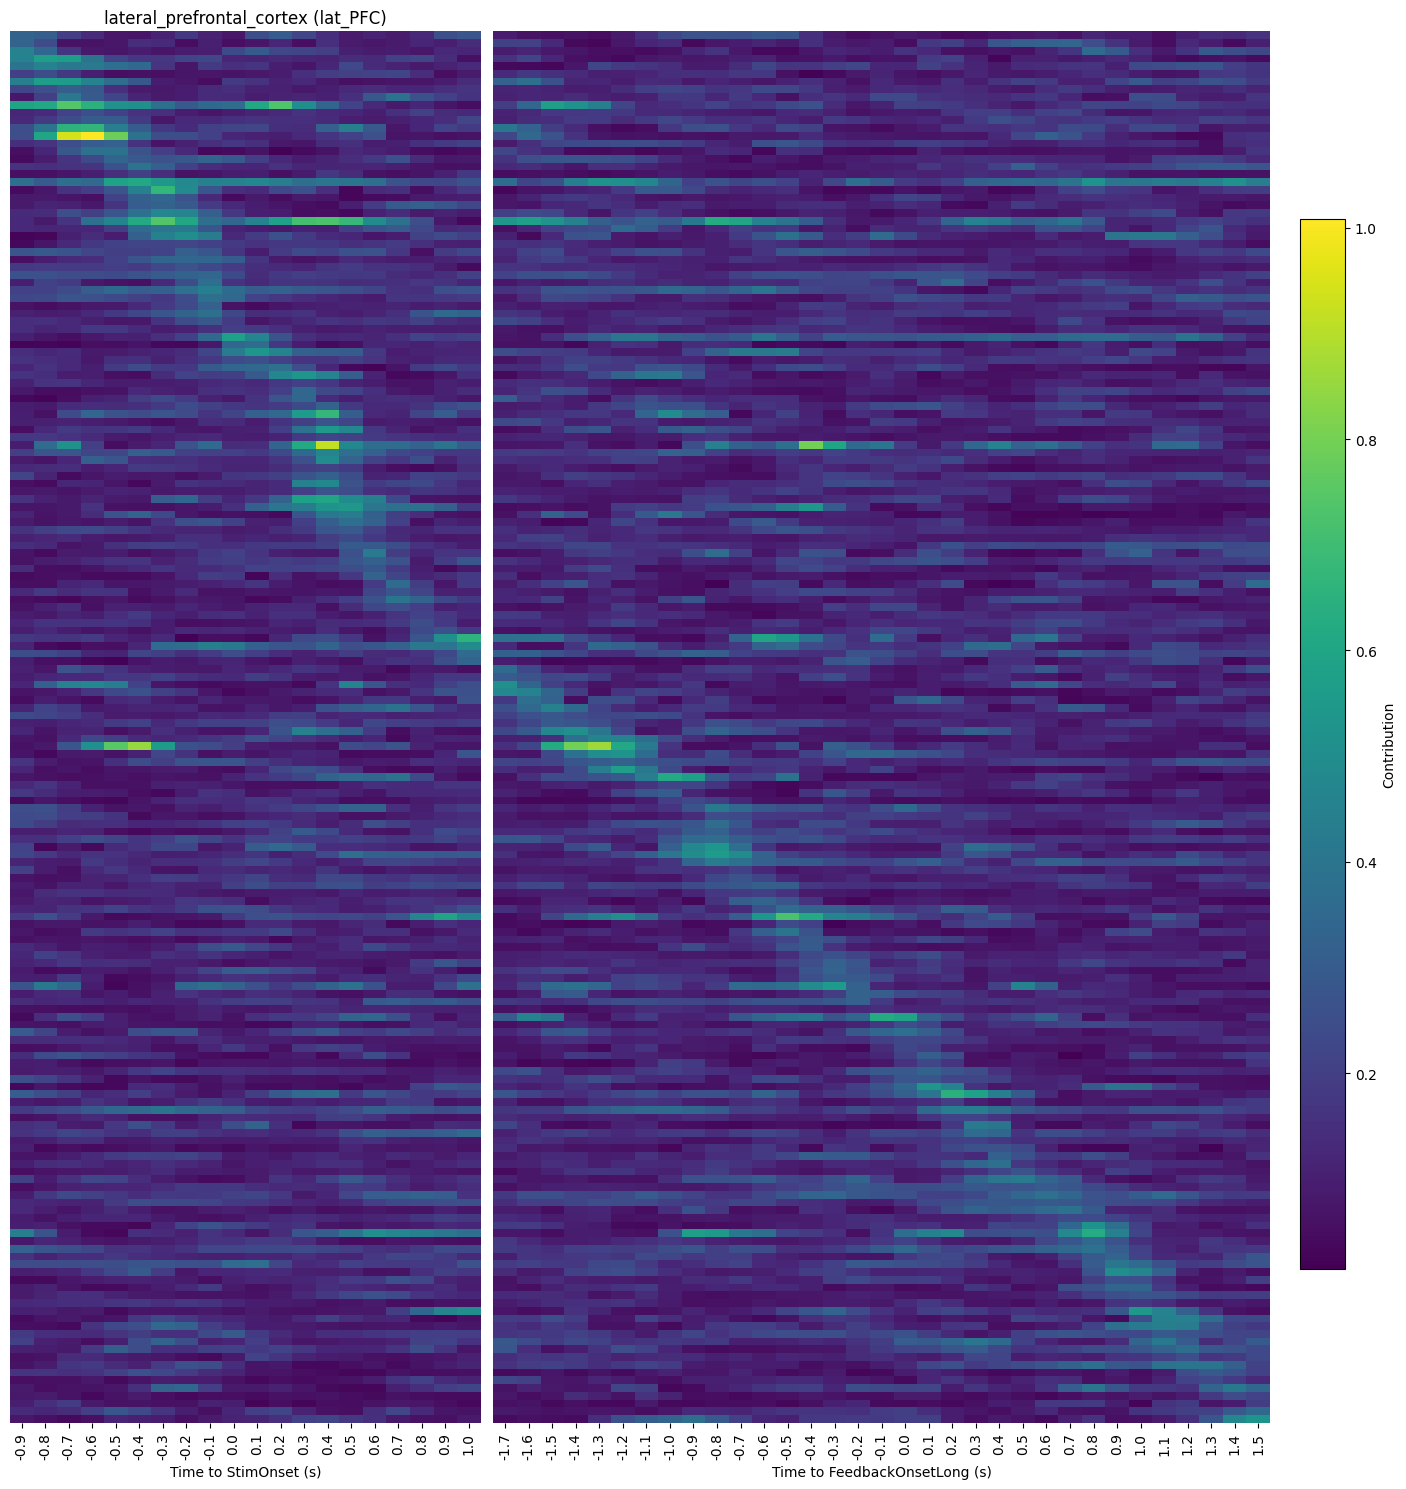

In [59]:
args.mode = "pref"
args.sig_unit_level = pref_sig_unit_level
visualization_utils.plot_combined_accs(args)
visualization_utils.plot_combined_cross_accs(args)
plot_weights(args)

### Conf

0.7141666666666667


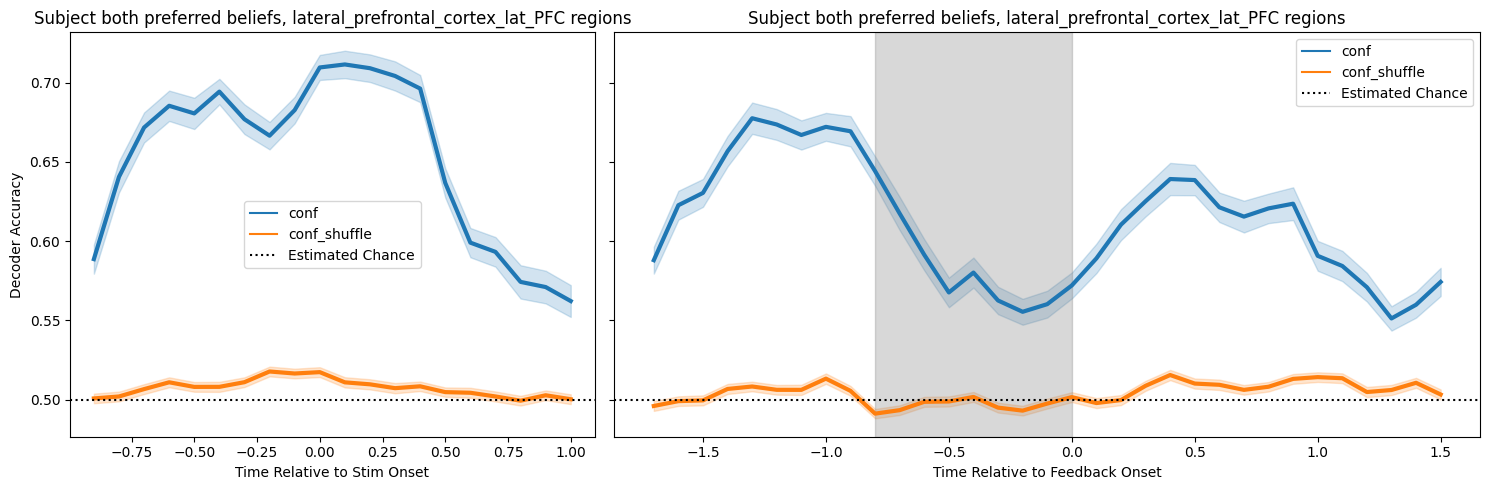

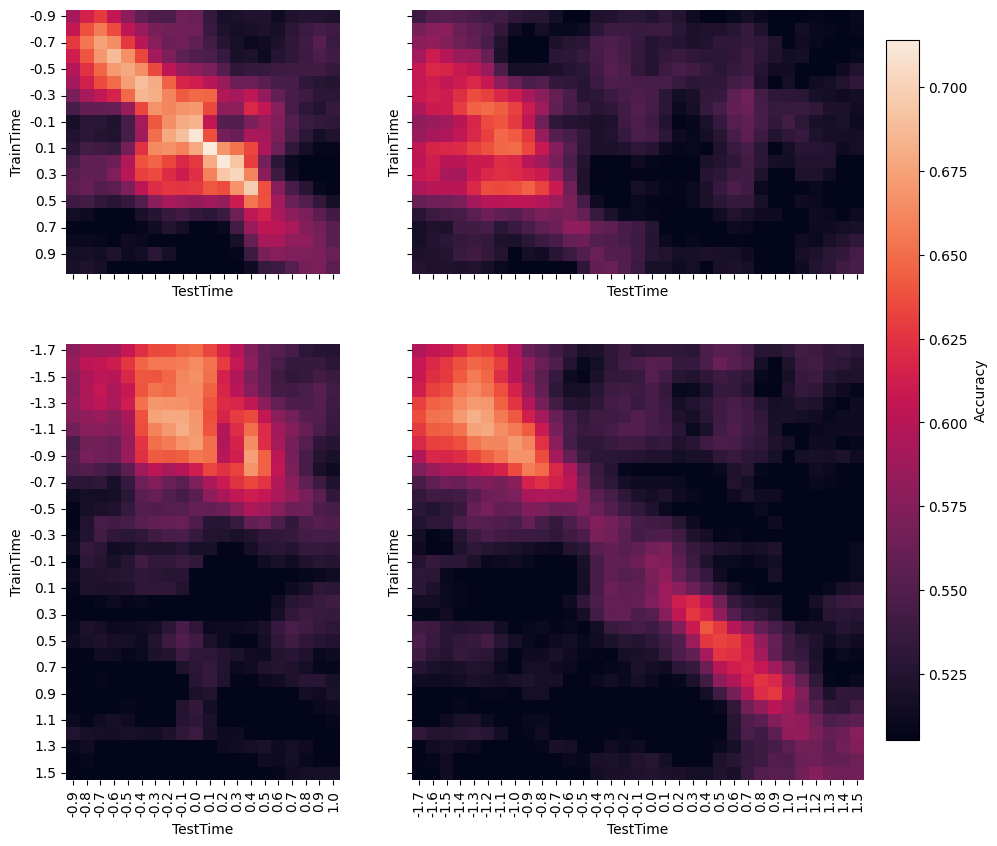

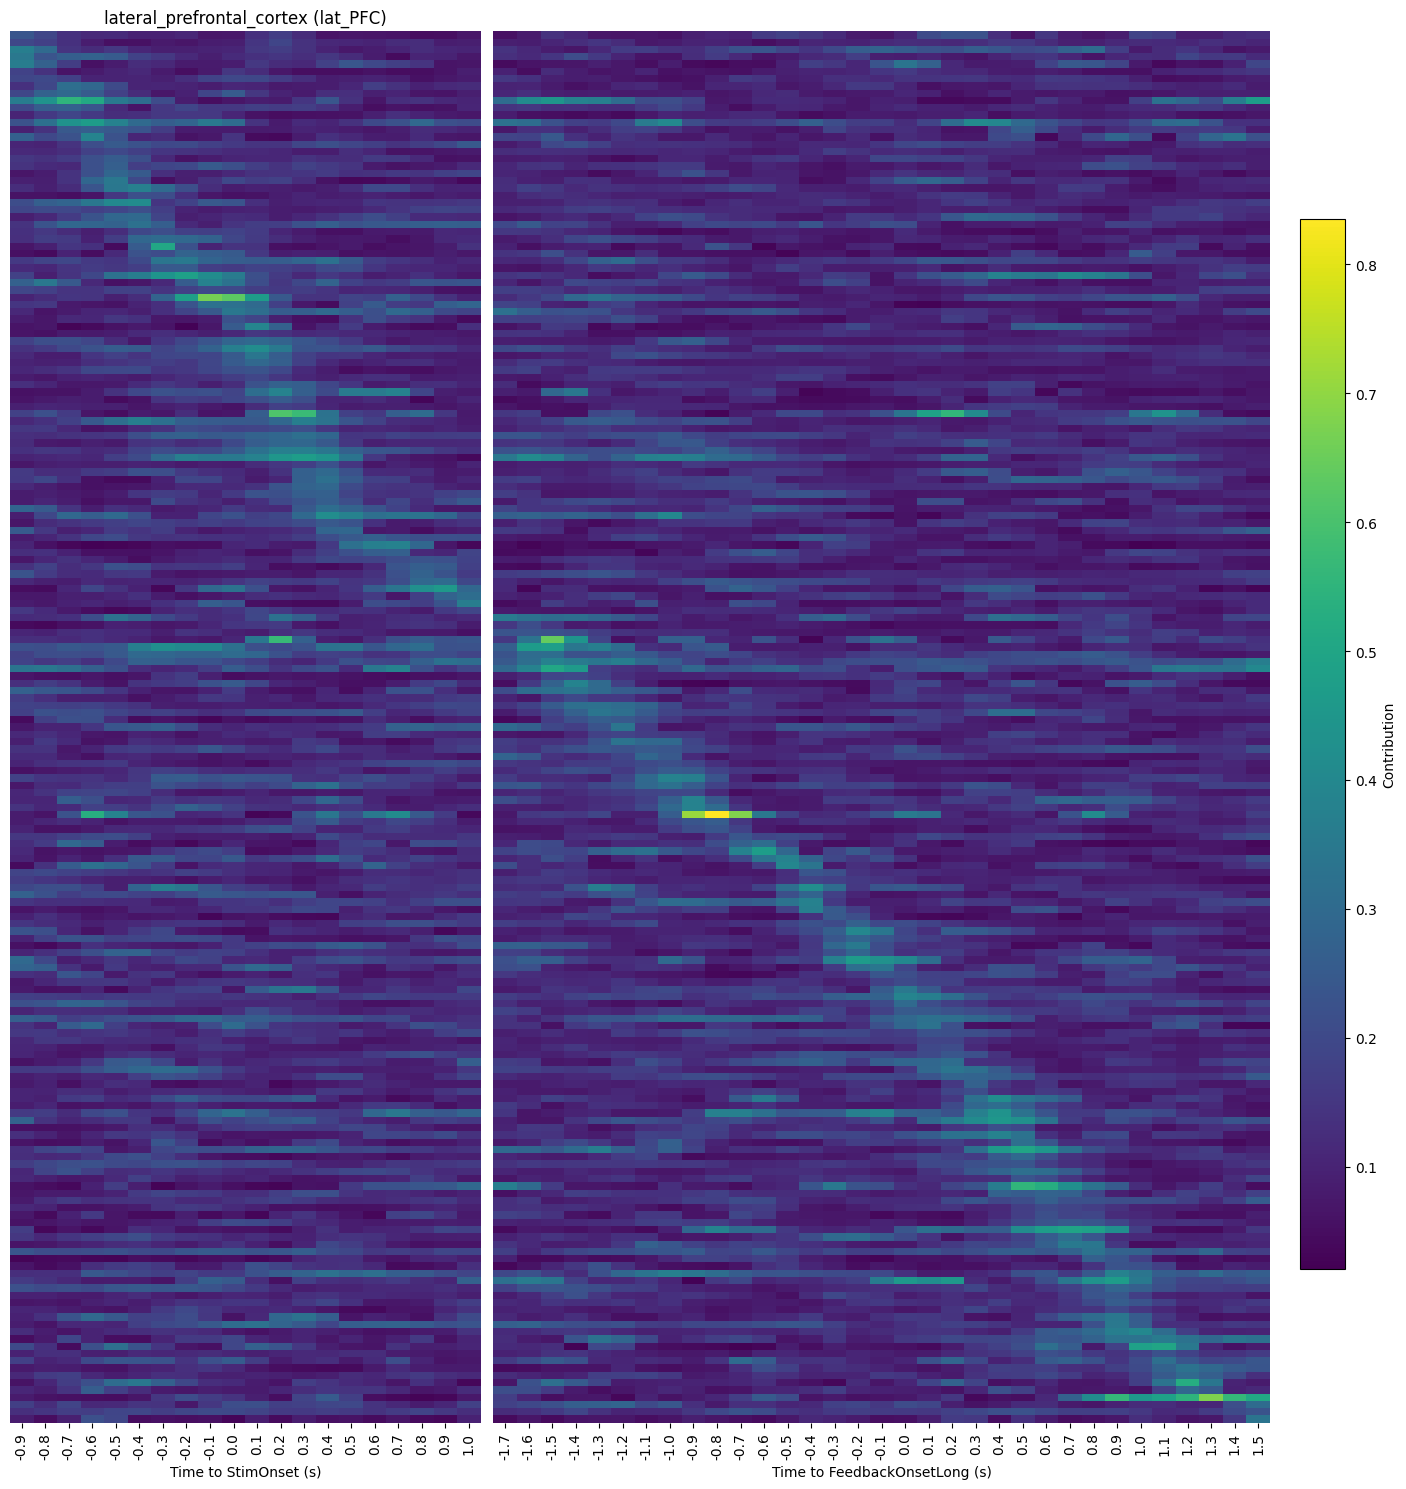

In [60]:
args.mode = "conf"
args.sig_unit_level = conf_sig_unit_level

visualization_utils.plot_combined_accs(args)
visualization_utils.plot_combined_cross_accs(args)
plot_weights(args)

## Conf/Pref in all regions combined?

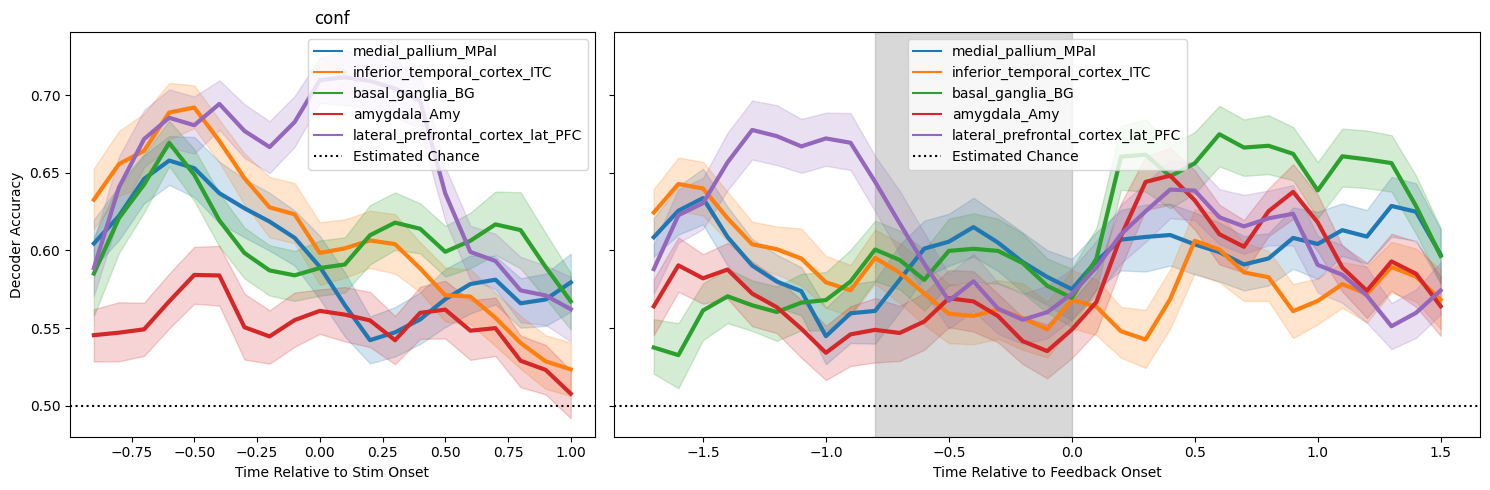

In [24]:
regions = ["medial_pallium_MPal", "inferior_temporal_cortex_ITC", "basal_ganglia_BG", "amygdala_Amy", "lateral_prefrontal_cortex_lat_PFC"]
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.region_level="structure_level2_cleaned"
args.mode = "conf"
args.sig_unit_level = "conf_99th_window_filter_drift"
args.subject = "both"

visualization_utils.plot_combined_accs_by_attr(args, attr="regions", values=regions)

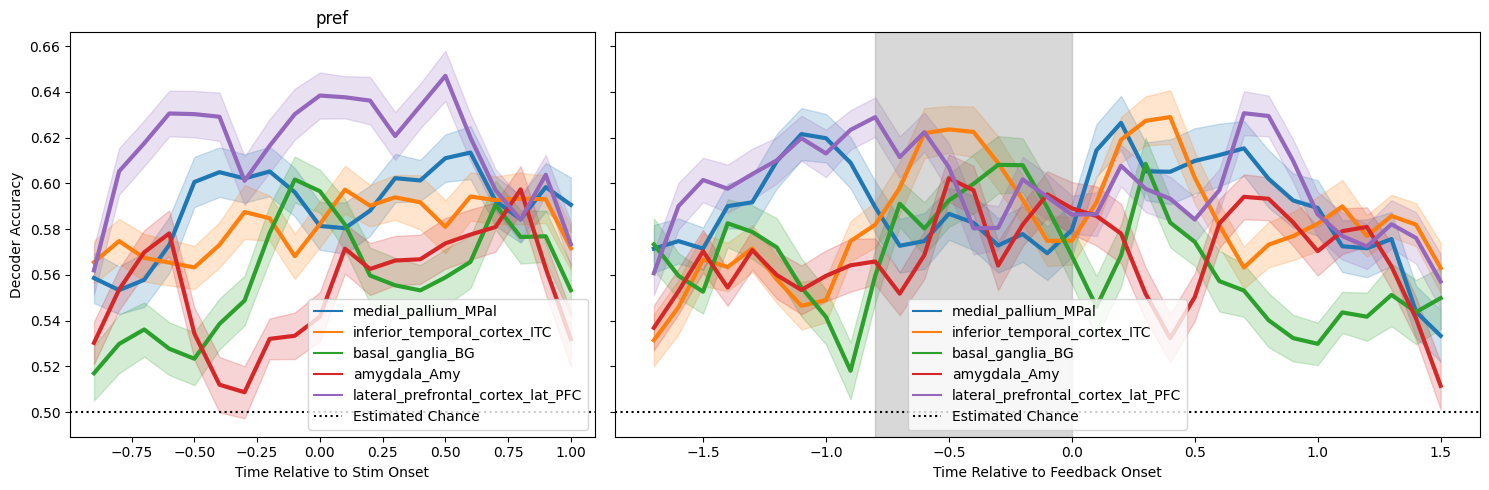

In [27]:
regions = ["medial_pallium_MPal", "inferior_temporal_cortex_ITC", "basal_ganglia_BG", "amygdala_Amy", "lateral_prefrontal_cortex_lat_PFC"]
# regions = ["medial_pallium_MPal", "inferior_temporal_cortex_ITC"]

args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.mode = "pref"
args.sig_unit_level = "pref_99th_window_filter_drift"
args.region_level="structure_level2_cleaned"
args.subject = "both"

visualization_utils.plot_combined_accs_by_attr(args, attr="regions", values=regions)

## What do different sig levels do for preference decoding?

Warning, shuffle not found: YELLOW_pref_shuffle_2
Warning, shuffle not found: YELLOW_pref_shuffle_3
Warning, shuffle not found: YELLOW_pref_shuffle_4
Warning, shuffle not found: YELLOW_pref_shuffle_6
Warning, shuffle not found: YELLOW_pref_shuffle_7
Warning, shuffle not found: STAR_pref_shuffle_8
Warning, shuffle not found: ESCHER_pref_shuffle_8
Warning, shuffle not found: YELLOW_pref_shuffle_9
Warning, shuffle not found: YELLOW_pref_shuffle_2
Warning, shuffle not found: YELLOW_pref_shuffle_3
Warning, shuffle not found: YELLOW_pref_shuffle_4
Warning, shuffle not found: YELLOW_pref_shuffle_6
Warning, shuffle not found: YELLOW_pref_shuffle_7
Warning, shuffle not found: STAR_pref_shuffle_8
Warning, shuffle not found: ESCHER_pref_shuffle_8
Warning, shuffle not found: YELLOW_pref_shuffle_9
Warning, shuffle not found: YELLOW_pref_shuffle_2
Warning, shuffle not found: YELLOW_pref_shuffle_3
Warning, shuffle not found: YELLOW_pref_shuffle_4
Warning, shuffle not found: YELLOW_pref_shuffle_6
Warn

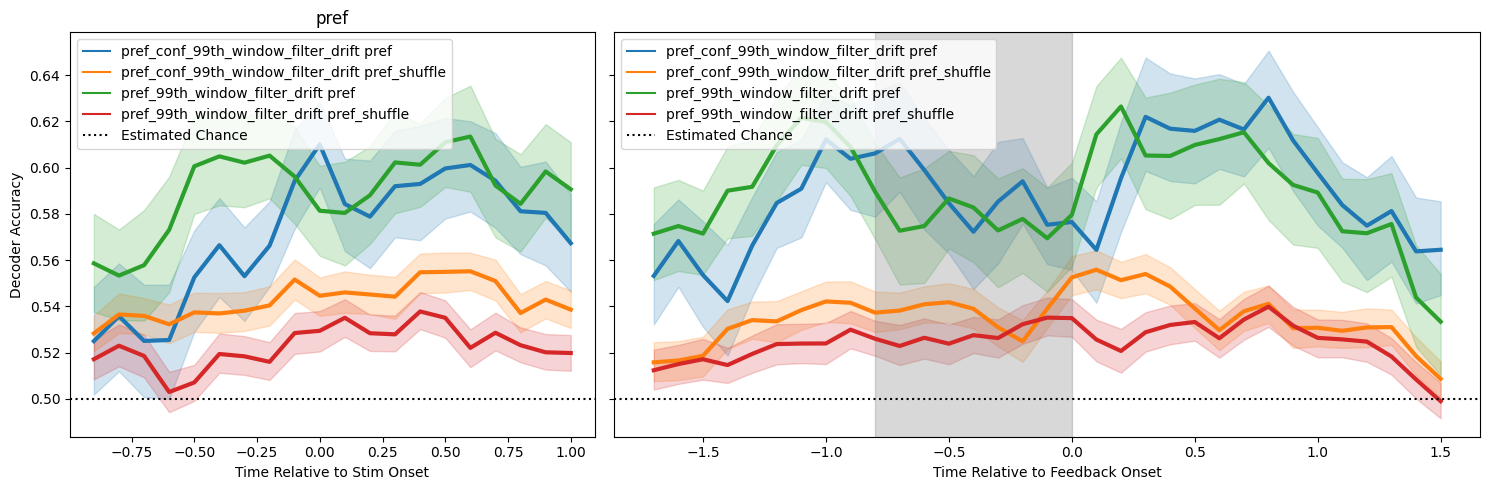

In [78]:
sig_levels = ["pref_conf_99th_window_filter_drift", "pref_99th_window_filter_drift"]

args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.region_level="structure_level2_cleaned"
args.regions = "medial_pallium_MPal"
args.mode = "pref"
args.subject = "both"

visualization_utils.plot_combined_accs_by_attr(args, attr="sig_unit_level", values=sig_levels, num_shuffles=10)

Warning, shuffle not found: YELLOW_pref_shuffle_2
Warning, shuffle not found: YELLOW_pref_shuffle_3
Warning, shuffle not found: YELLOW_pref_shuffle_4
Warning, shuffle not found: CIRCLE_pref_shuffle_5
Warning, shuffle not found: YELLOW_pref_shuffle_6
Warning, shuffle not found: YELLOW_pref_shuffle_7
Warning, shuffle not found: YELLOW_pref_shuffle_9
Warning, shuffle not found: YELLOW_pref_shuffle_2
Warning, shuffle not found: YELLOW_pref_shuffle_3
Warning, shuffle not found: YELLOW_pref_shuffle_4
Warning, shuffle not found: CIRCLE_pref_shuffle_5
Warning, shuffle not found: YELLOW_pref_shuffle_6
Warning, shuffle not found: YELLOW_pref_shuffle_7
Warning, shuffle not found: YELLOW_pref_shuffle_9
Warning, shuffle not found: YELLOW_pref_shuffle_2
Warning, shuffle not found: YELLOW_pref_shuffle_3
Warning, shuffle not found: YELLOW_pref_shuffle_4
Warning, shuffle not found: CIRCLE_pref_shuffle_5
Warning, shuffle not found: YELLOW_pref_shuffle_6
Warning, shuffle not found: YELLOW_pref_shuffle_7


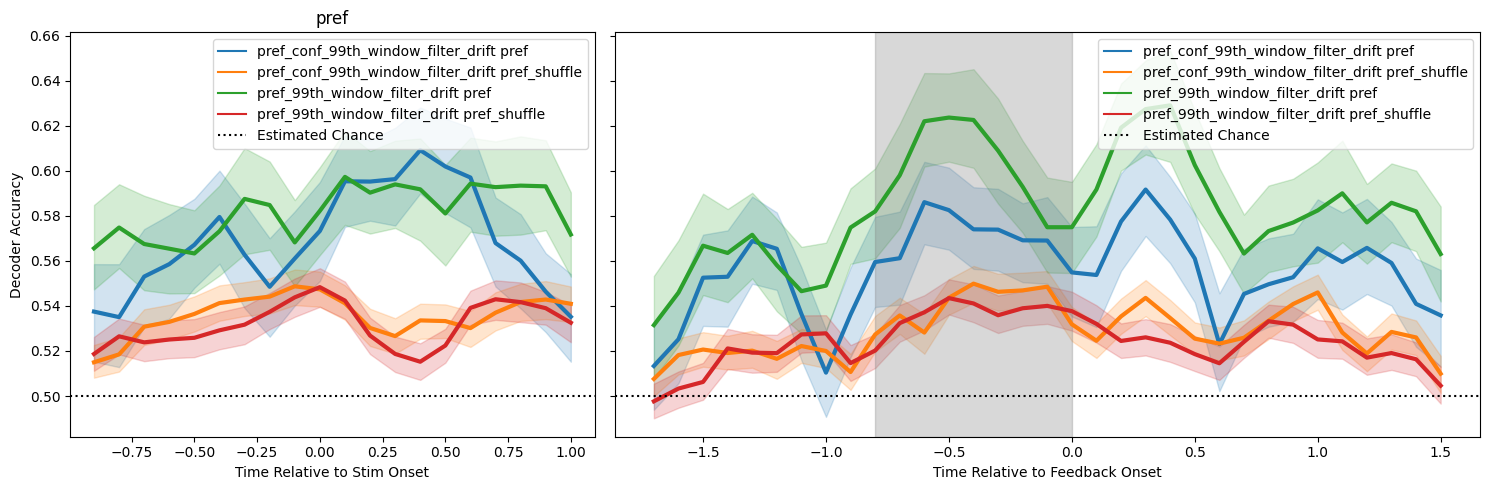

In [79]:
sig_levels = ["pref_conf_99th_window_filter_drift", "pref_99th_window_filter_drift"]

args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.shuffle_method = "session_permute"
args.region_level="structure_level2_cleaned"
args.regions = "inferior_temporal_cortex_ITC"
args.mode = "pref"
args.subject = "both"

visualization_utils.plot_combined_accs_by_attr(args, attr="sig_unit_level", values=sig_levels, num_shuffles=10)